# Projeto de INF1032

## Análise do Mercado Financeiro durante a pandemia.

### Passos:

● Coletar os dados da empresa Orama Investimentos.

● Fazer uma análise do mercado financeiro durante as crises,
comparando com os dados de 2020 e 2008.

● Identificar se existirá um crescimento das ações para os próximos 3
meses através de um modelo de classificação.

### Alunos: Barbara Herrera, Geam Morales e Nathalia Inácio

## Imports

In [1]:
import pandas as pd
import dataframe_image as dfi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from re import sub
from decimal import Decimal


# Ocultando Warnings indesejados
import warnings
warnings.filterwarnings('ignore')

# Pandemia 2008

## Lendo arquivo cotação 2008

In [2]:
data_url = '2008_Cotação.csv'
data_2008 = pd.read_csv(data_url, header='infer', error_bad_lines=False, sep=';',)
print("Total de Linhas: ",data_2008.shape[0])
data_2008.head()

Total de Linhas:  5573


,Empresa,Mês,Abertura,Segmento
0,ABC BRASIL,1,"573,14",Serviços Bancários
1,ABC BRASIL,10,"178,9",Serviços Bancários
2,ABC BRASIL,11,"155,45",Serviços Bancários
3,ABC BRASIL,12,"157,61",Serviços Bancários
4,ABC BRASIL,2,"396,6",Serviços Bancários


## Fazendo transposição

In [3]:
data_2008 = data_2008.pivot(index=['Segmento', 'Empresa'], columns='Mês', values='Abertura')
# dfi.export(data_2008,"tabela_2008.png", max_rows = -1)
data_2008.head()

Mês                                       1       2       3         4   \
Segmento              Empresa                                            
Agropecuária          SLC AGRICOLA    805,76  857,33  986,26  1.370,22   
Alimentos Processados JBS             540,32  525,45  572,65    512,72   
                      M.DIASBRANCO  1.166,72  784,78  738,87  1.005,23   
                      MARFRIG         643,68  614,66  698,37     820,9   
                      MINERVA         526,27  427,73   357,2    429,53   

Mês                                       5         6         7         8   \
Segmento              Empresa                                                
Agropecuária          SLC AGRICOLA  1.506,47  1.452,53  1.512,72  1.061,17   
Alimentos Processados JBS             947,97  1.086,89    635,88     602,7   
                      M.DIASBRANCO  1.020,48    945,18   1.066,6    906,34   
                      MARFRIG         918,35    951,75    870,35    821,69   
                      MINERVA         612,59    495,95     342,4     346,4   

Mês                                     9       10      11      12  
Segmento              Empresa                                       
Agropecuária          SLC AGRICOLA  983,34  553,59  440,39  534,04  
Alimentos Processados JBS           529,88  317,53  235,28   282,8  
                      M.DIASBRANCO  867,62  627,59  646,34  569,36  
                      MARFRIG       650,92  620,69  341,63  312,64  
                      MINERVA       284,47   117,7   85,87      77

In [4]:
data_2008.to_csv('2008.csv')

## Visualizando nova tabela transposta

In [5]:
data_url = '2008.csv'
data_2008 = pd.read_csv(data_url, header='infer', error_bad_lines=False, sep=',',)
print("Total de Linhas: ",data_2008.shape[0])
data_2008.head()

Total de Linhas:  687


,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
0,Agropecuária,SLC AGRICOLA,"805,76","857,33","986,26","1.370,22","1.506,47","1.452,53","1.512,72","1.061,17","983,34","553,59","440,39","534,04"
1,Alimentos Processados,JBS,"540,32","525,45","572,65","512,72","947,97","1.086,89","635,88","602,7","529,88","317,53","235,28","282,8"
2,Alimentos Processados,M.DIASBRANCO,"1.166,72","784,78","738,87","1.005,23","1.020,48","945,18","1.066,6","906,34","867,62","627,59","646,34","569,36"
3,Alimentos Processados,MARFRIG,"643,68","614,66","698,37","820,9","918,35","951,75","870,35","821,69","650,92","620,69","341,63","312,64"
4,Alimentos Processados,MINERVA,"526,27","427,73","357,2","429,53","612,59","495,95","342,4","346,4","284,47","117,7","85,87",77


## Tratando e convertendo os dados de valores

In [6]:
for month in range(1, 13): 
    data_2008[str(month)] = data_2008[str(month)].str.replace('.','')
    data_2008[str(month)] = data_2008[str(month)].str.replace(',','.')
    data_2008[str(month)] = data_2008[str(month)].astype(float)

data_2008.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
0,Agropecuária,SLC AGRICOLA,805.76,857.33,986.26,1370.22,1506.47,1452.53,1512.72,1061.17,983.34,553.59,440.39,534.04
1,Alimentos Processados,JBS,540.32,525.45,572.65,512.72,947.97,1086.89,635.88,602.70,529.88,317.53,235.28,282.80
2,Alimentos Processados,M.DIASBRANCO,1166.72,784.78,738.87,1005.23,1020.48,945.18,1066.60,906.34,867.62,627.59,646.34,569.36
3,Alimentos Processados,MARFRIG,643.68,614.66,698.37,820.90,918.35,951.75,870.35,821.69,650.92,620.69,341.63,312.64
4,Alimentos Processados,MINERVA,526.27,427.73,357.20,429.53,612.59,495.95,342.40,346.40,284.47,117.70,85.87,77.00


## Maiores valores de abertura das empresas em 2008

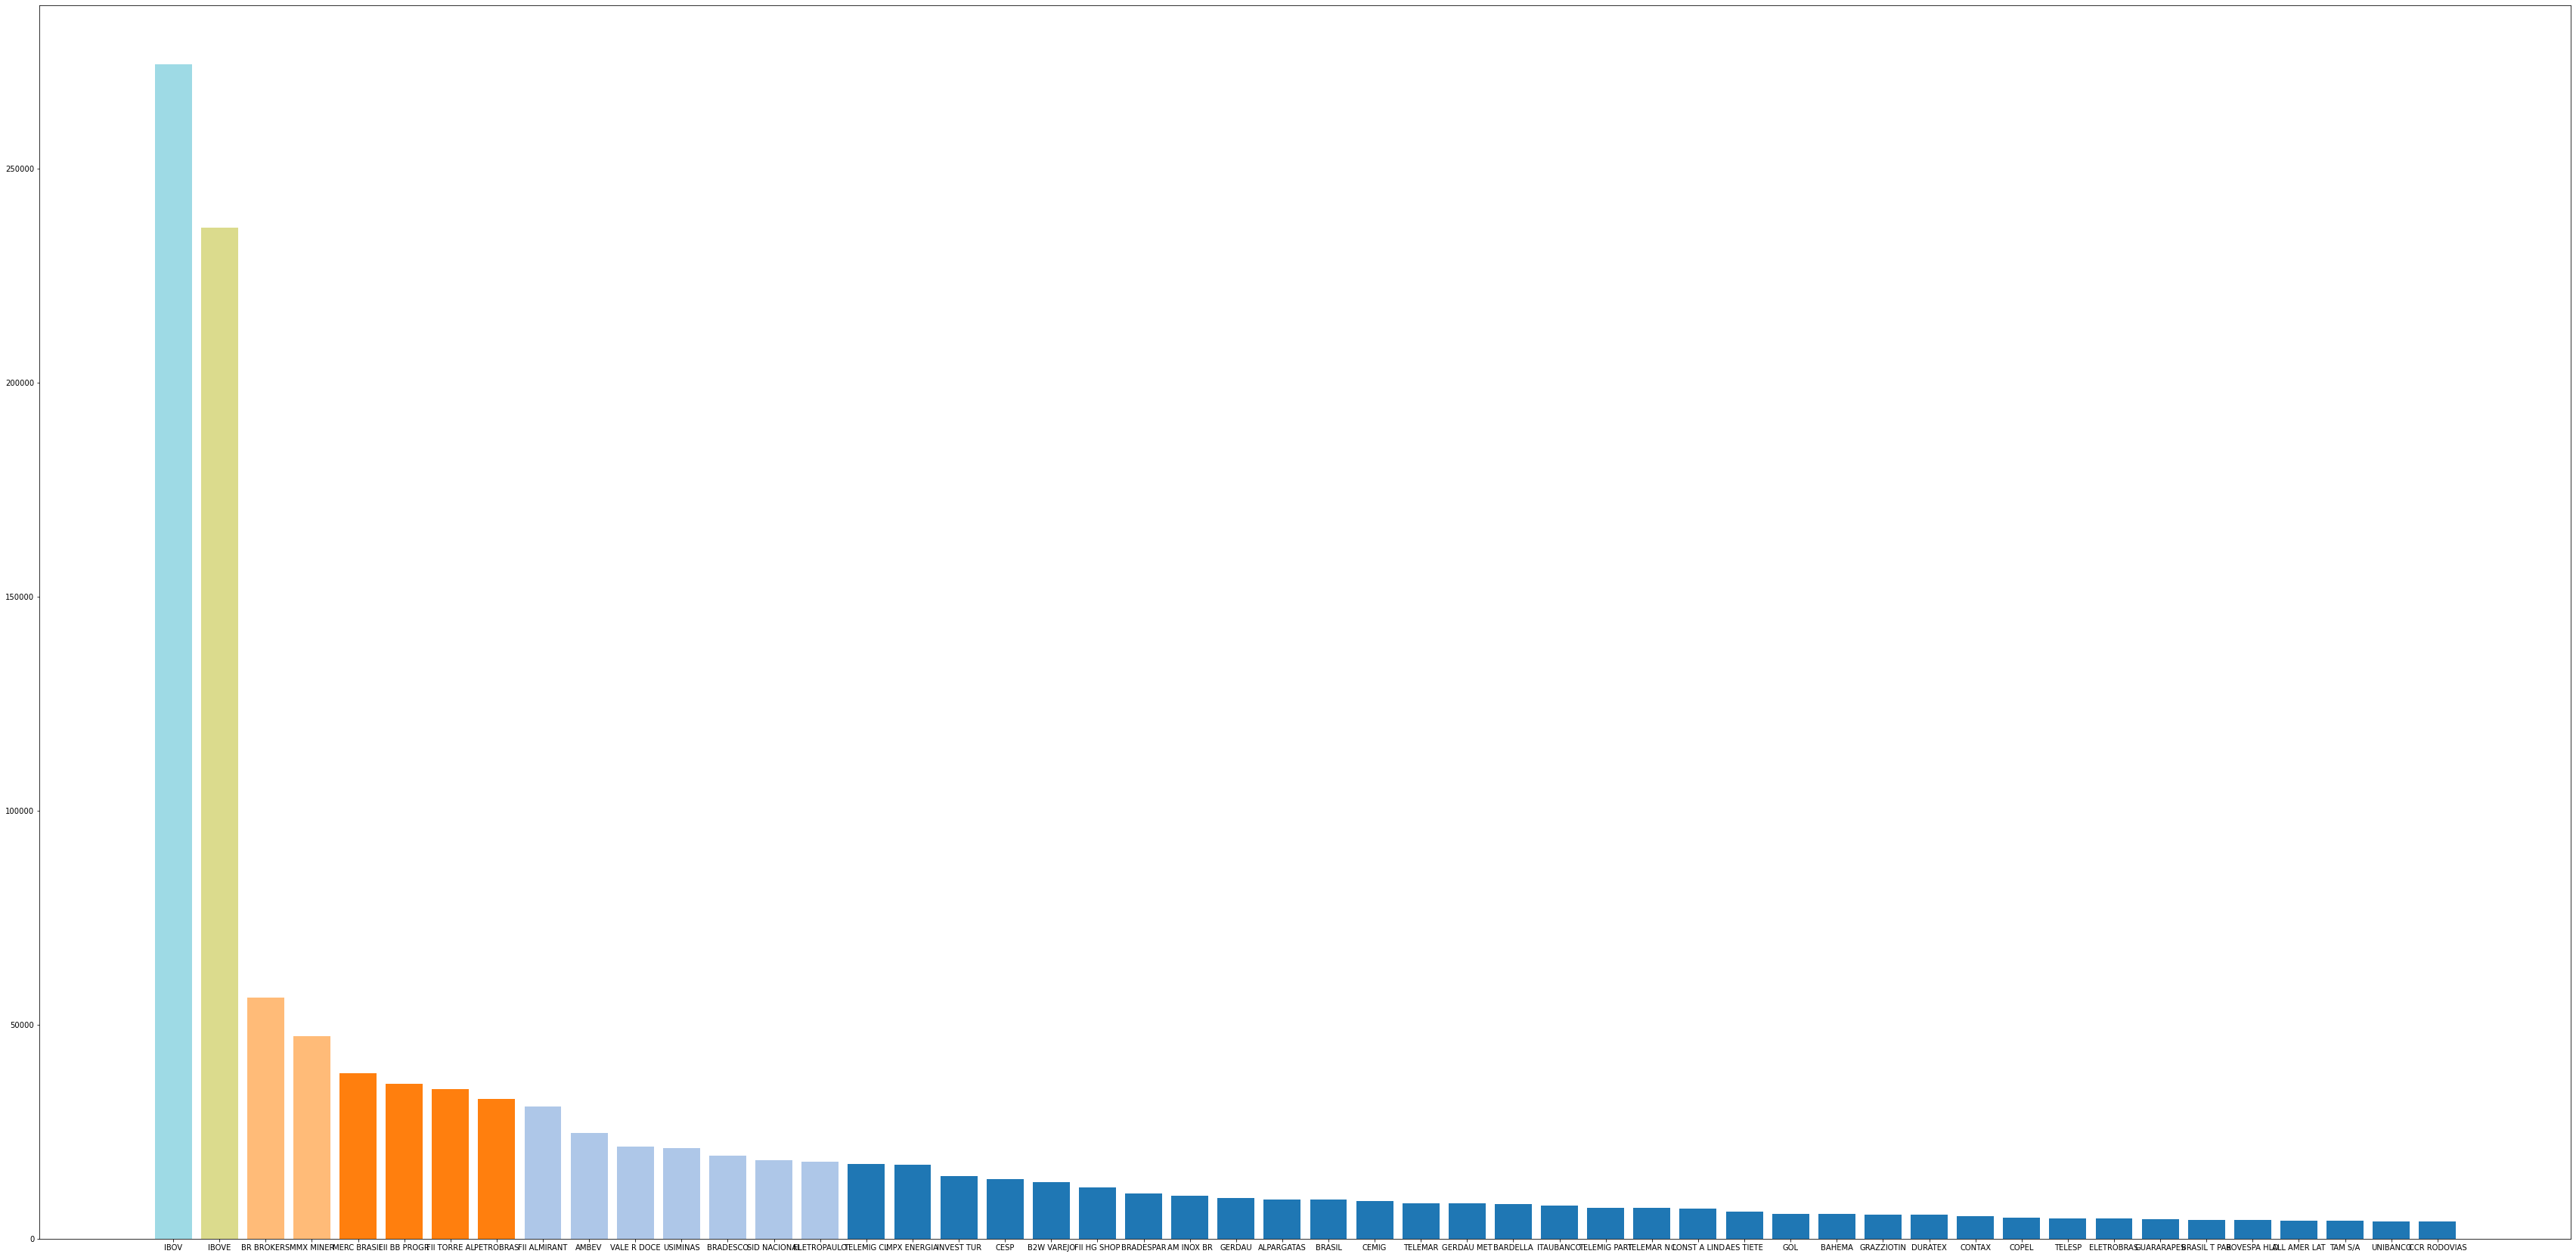

In [7]:
data_2008_largest_abertura = data_2008.nlargest(50, '1')

empresa = data_2008_largest_abertura['Empresa']
janeiro = data_2008_largest_abertura['1']


my_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, janeiro, color=my_cmap(rescale(janeiro)))
plt.show()

## Menores valores de abertura das empresas em 2008

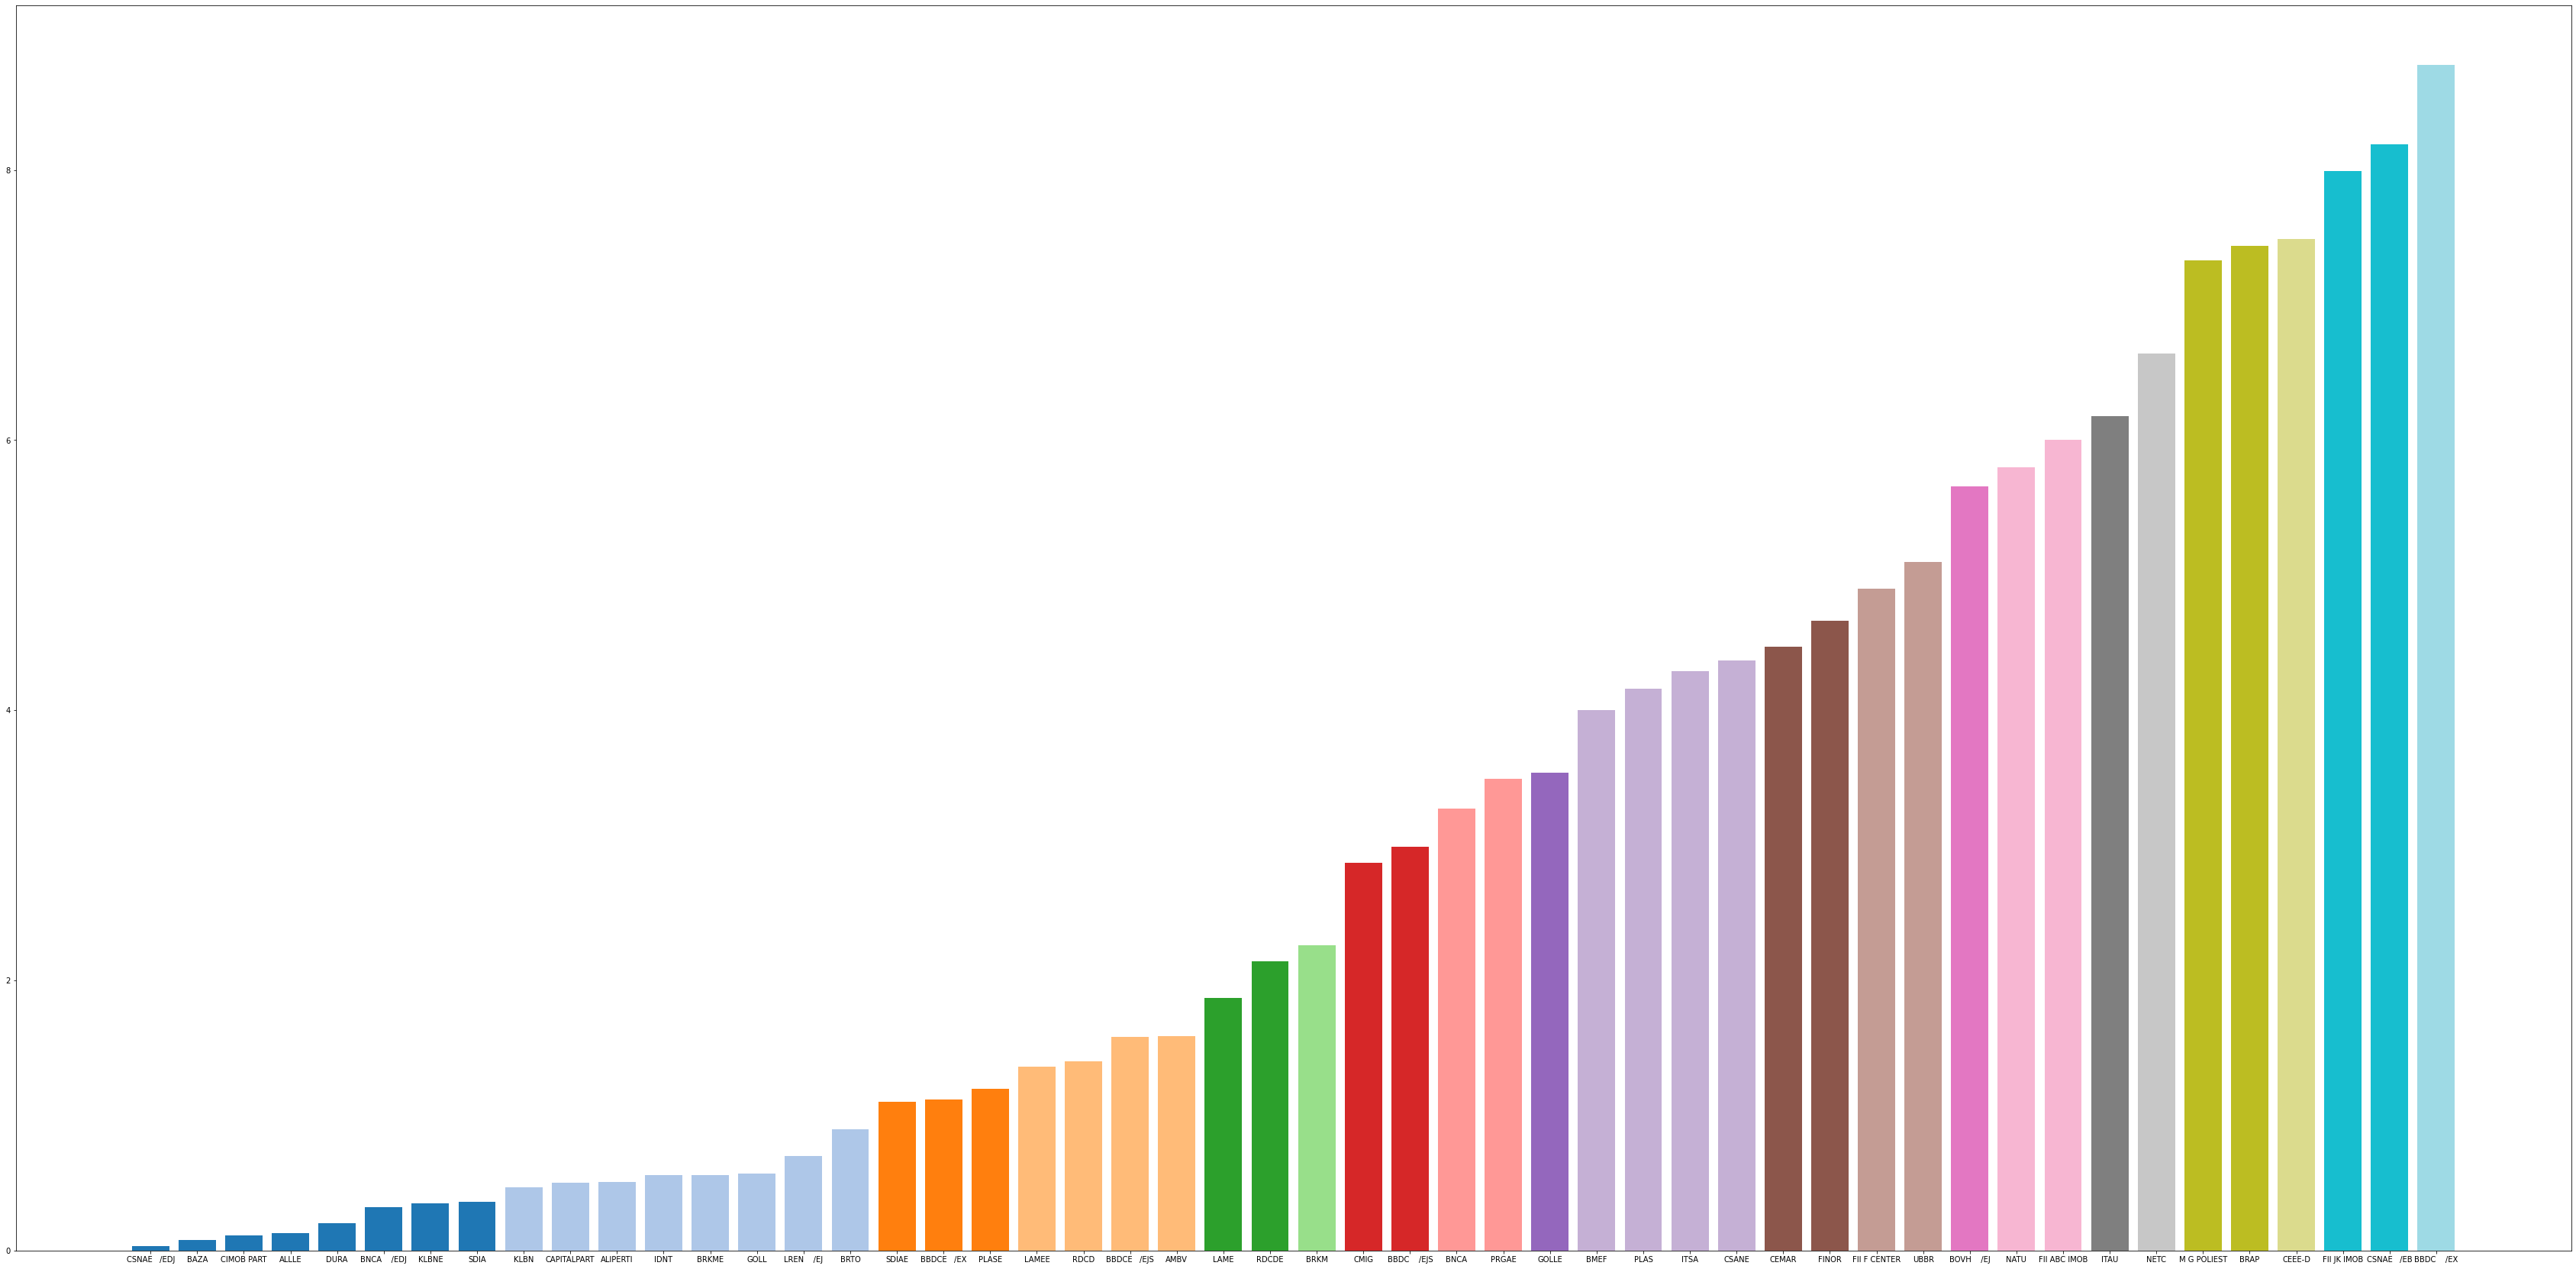

In [8]:
data_2008_lowest_abertura = data_2008.nsmallest(50, '1')

empresa = data_2008_lowest_abertura['Empresa']
janeiro = data_2008_lowest_abertura['1']

my_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, janeiro, color=my_cmap(rescale(janeiro)))
plt.show()

## Menores valores de abertura dos segmentos em 2008

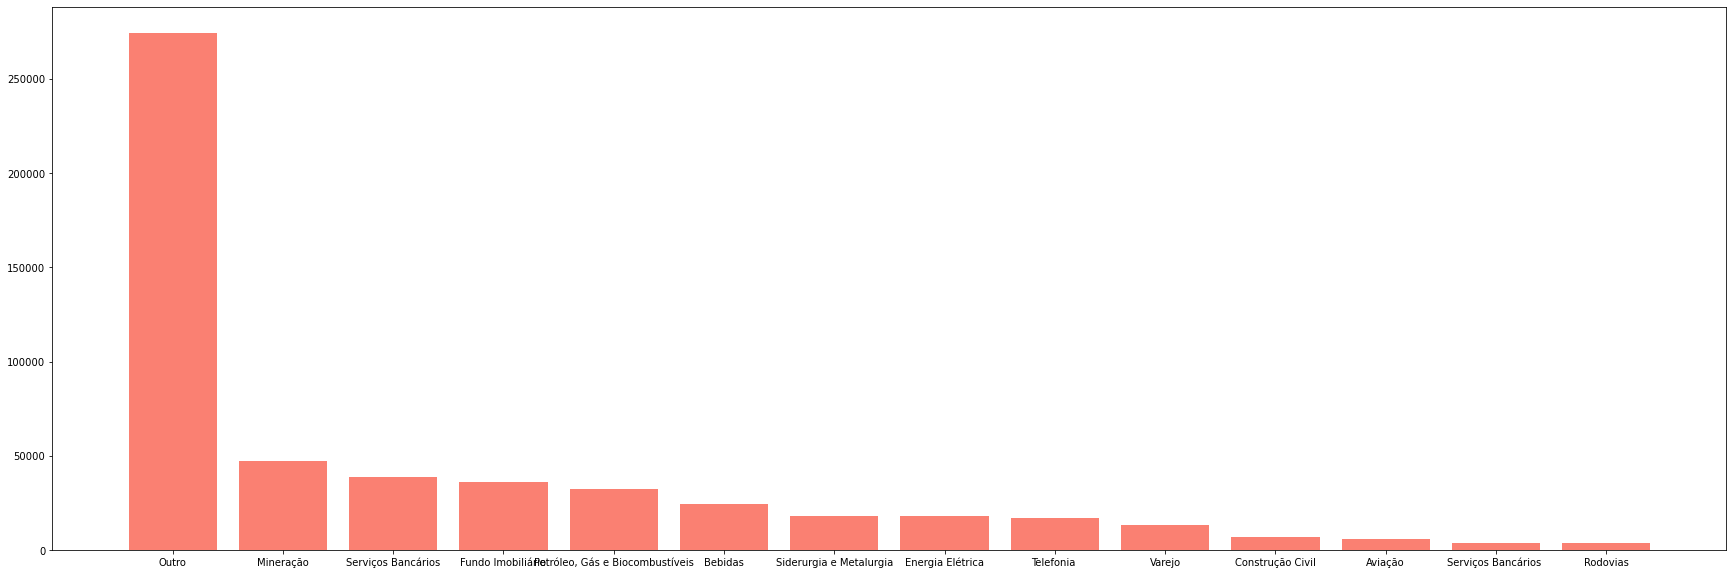

In [9]:
data_2008_largest_abertura = data_2008.nlargest(50, '1')

empresa = data_2008_largest_abertura['Segmento']
janeiro = data_2008_largest_abertura['1']

fig = plt.figure(figsize =(30, 10))
plt.bar(empresa, janeiro, facecolor = 'salmon')
plt.show()

## Maiores valores de abertura dos segmentos em 2008

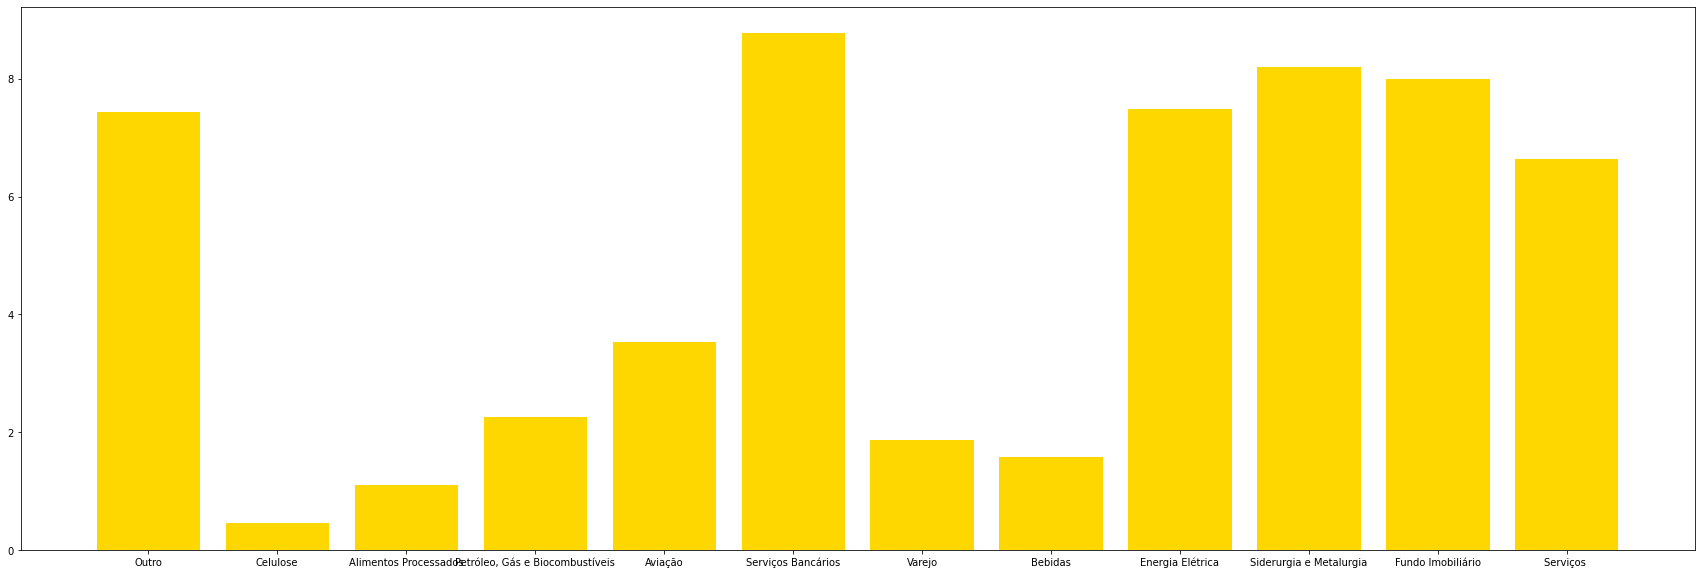

In [10]:
data_2008_lowest_abertura = data_2008.nsmallest(50, '1')

empresa = data_2008_lowest_abertura['Segmento']
janeiro = data_2008_lowest_abertura['1']

fig = plt.figure(figsize =(30, 10))
plt.bar(empresa, janeiro, facecolor = 'gold')
plt.show()

## Maiores valores de fechamento das empresas em 2008

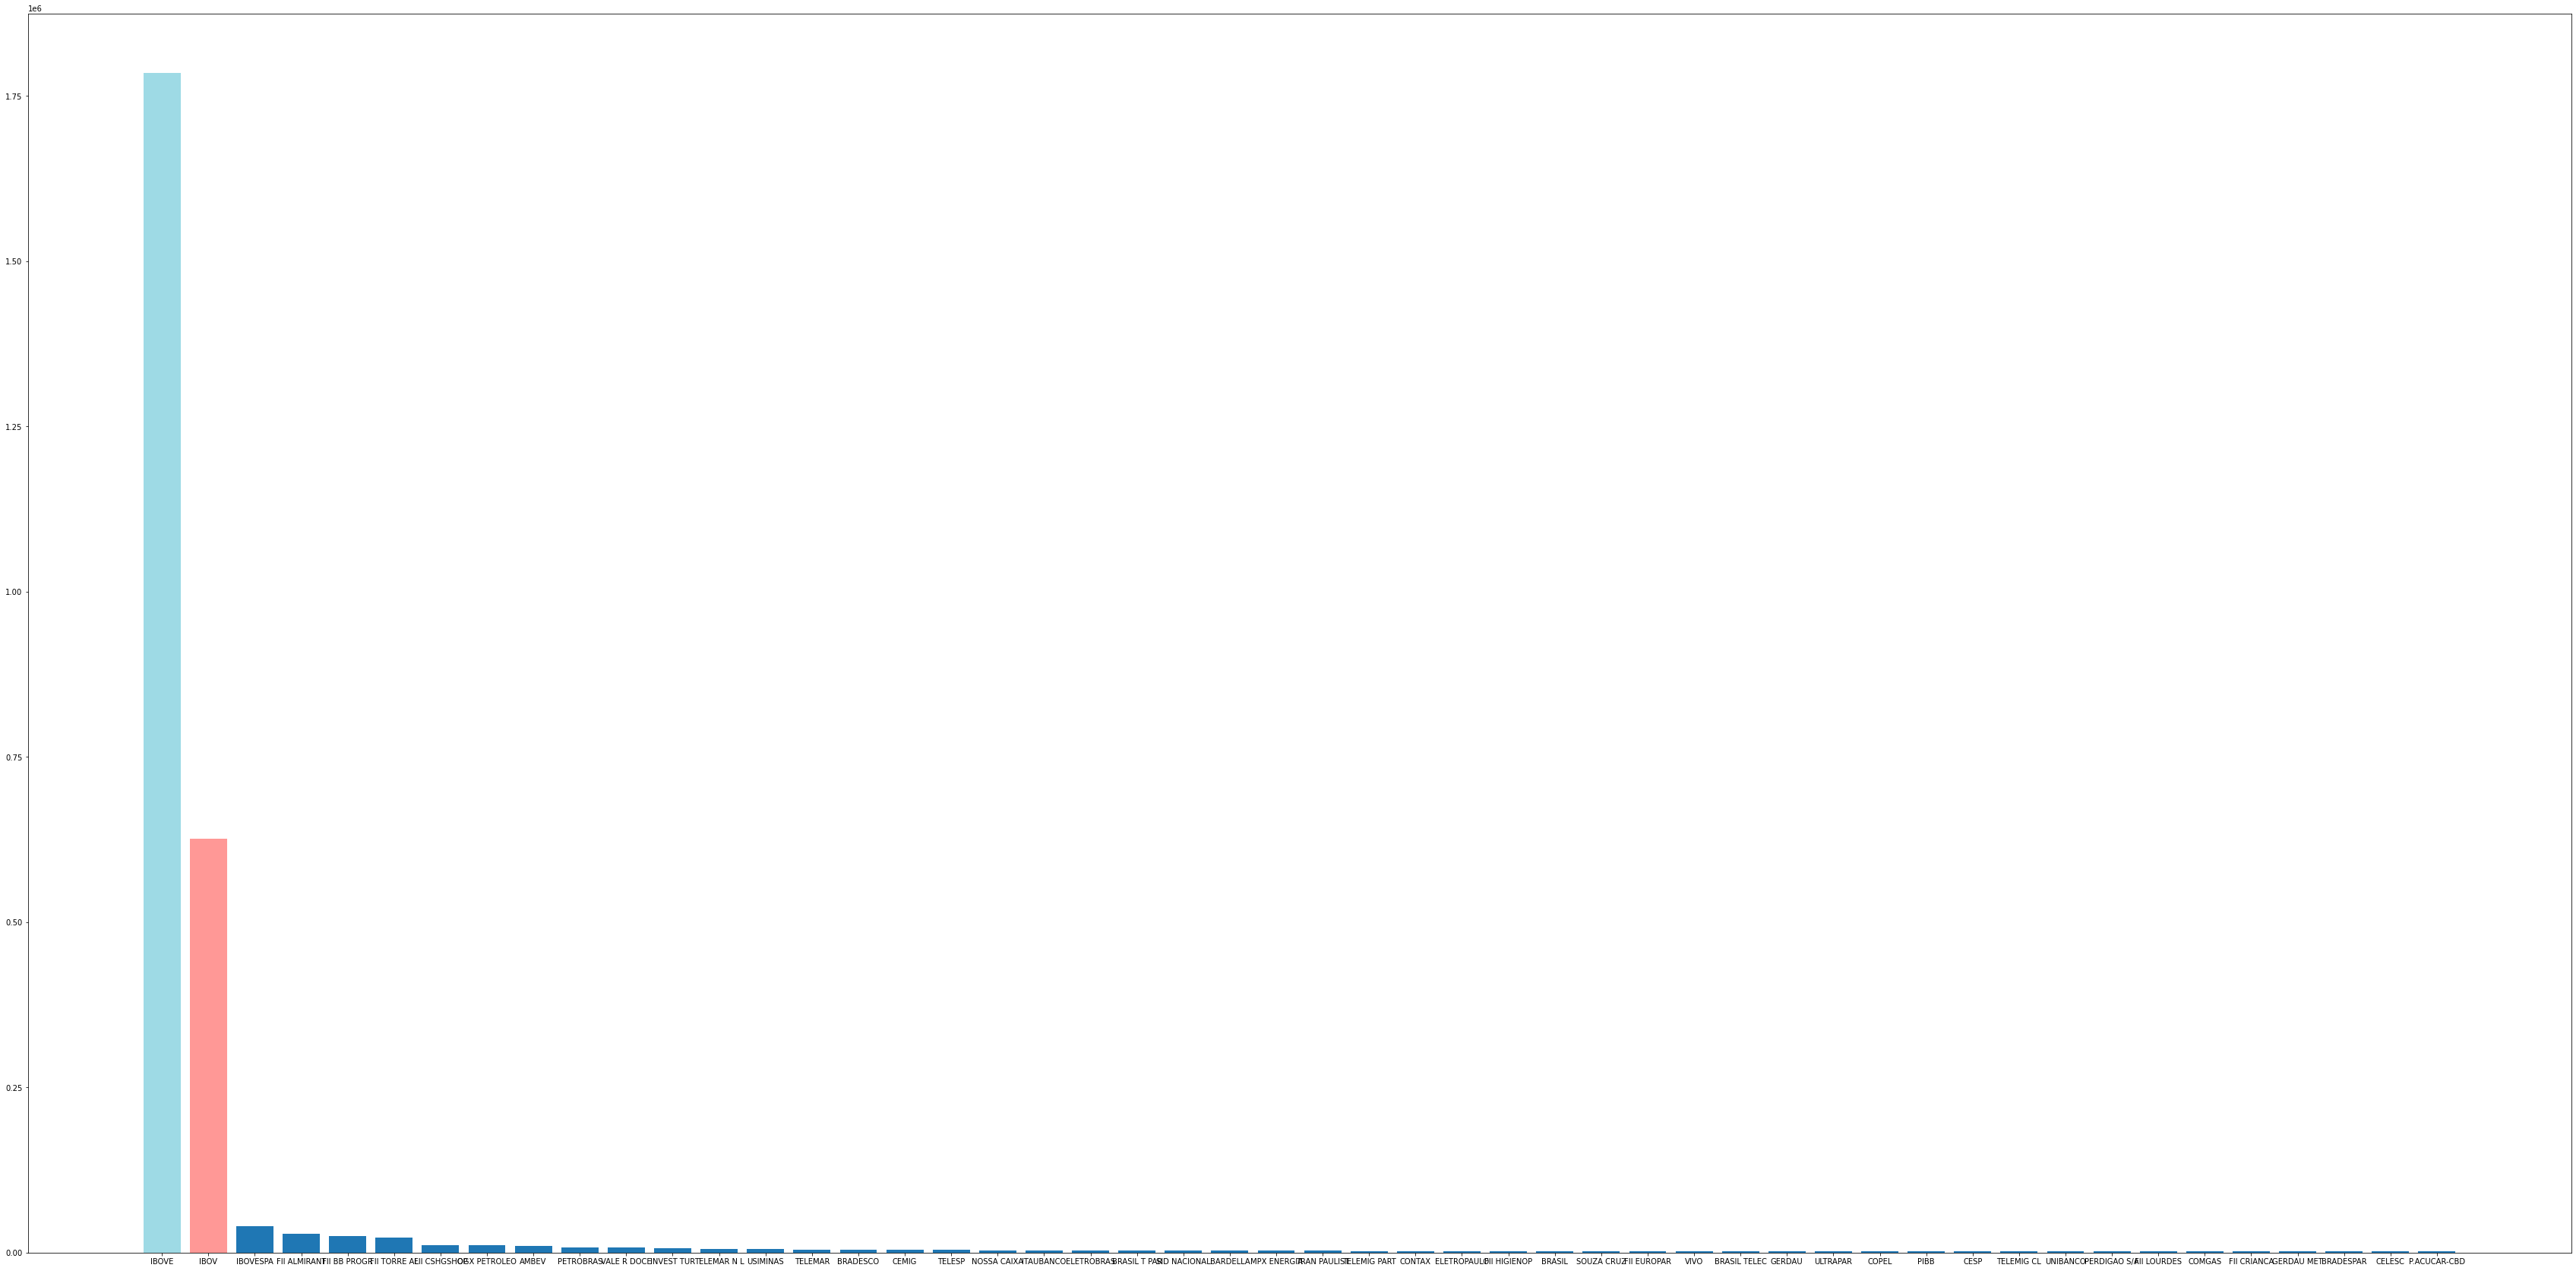

In [11]:
data_2008_largest_fechamento = data_2008.nlargest(50, '12')

empresa = data_2008_largest_fechamento['Empresa']
dezembro = data_2008_largest_fechamento['12']

my_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, dezembro, color=my_cmap(rescale(dezembro)))
plt.show()

## Menores valores de fechamento das empresas em 2008

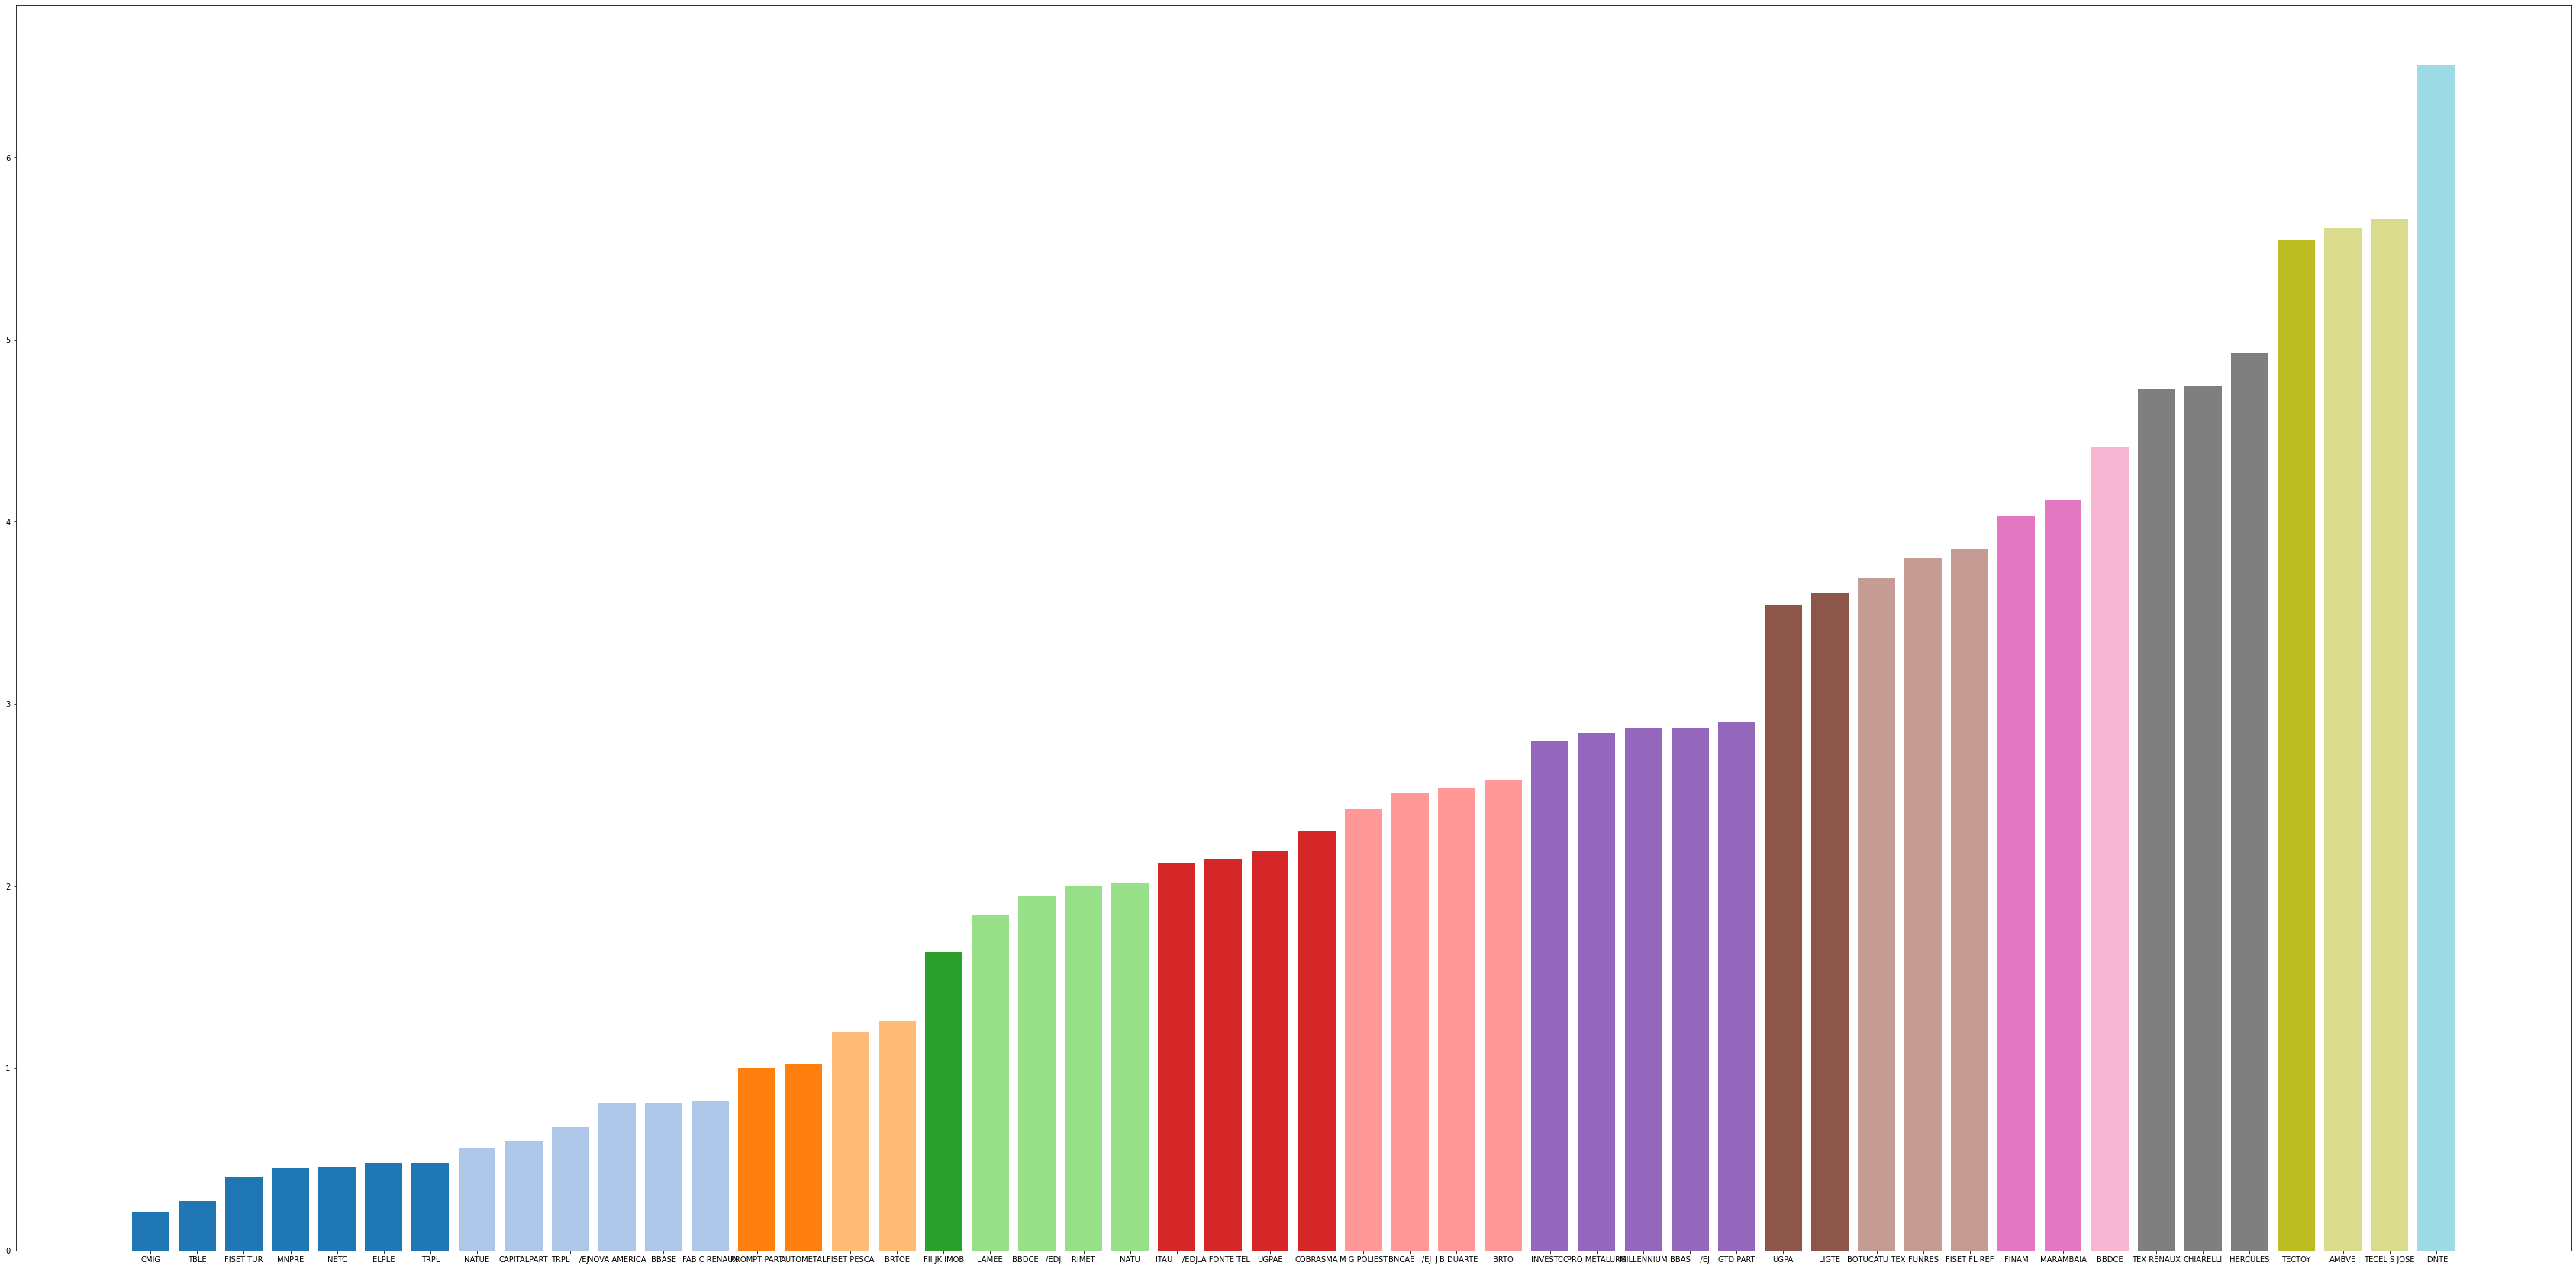

In [12]:
data_2008_lowest_fechamento = data_2008.nsmallest(50, '12')

empresa = data_2008_lowest_fechamento['Empresa']
dezembro = data_2008_lowest_fechamento['12']

my_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, dezembro, color=my_cmap(rescale(dezembro)))
plt.show()

## Maiores valores de fechamento dos segmentos em 2008

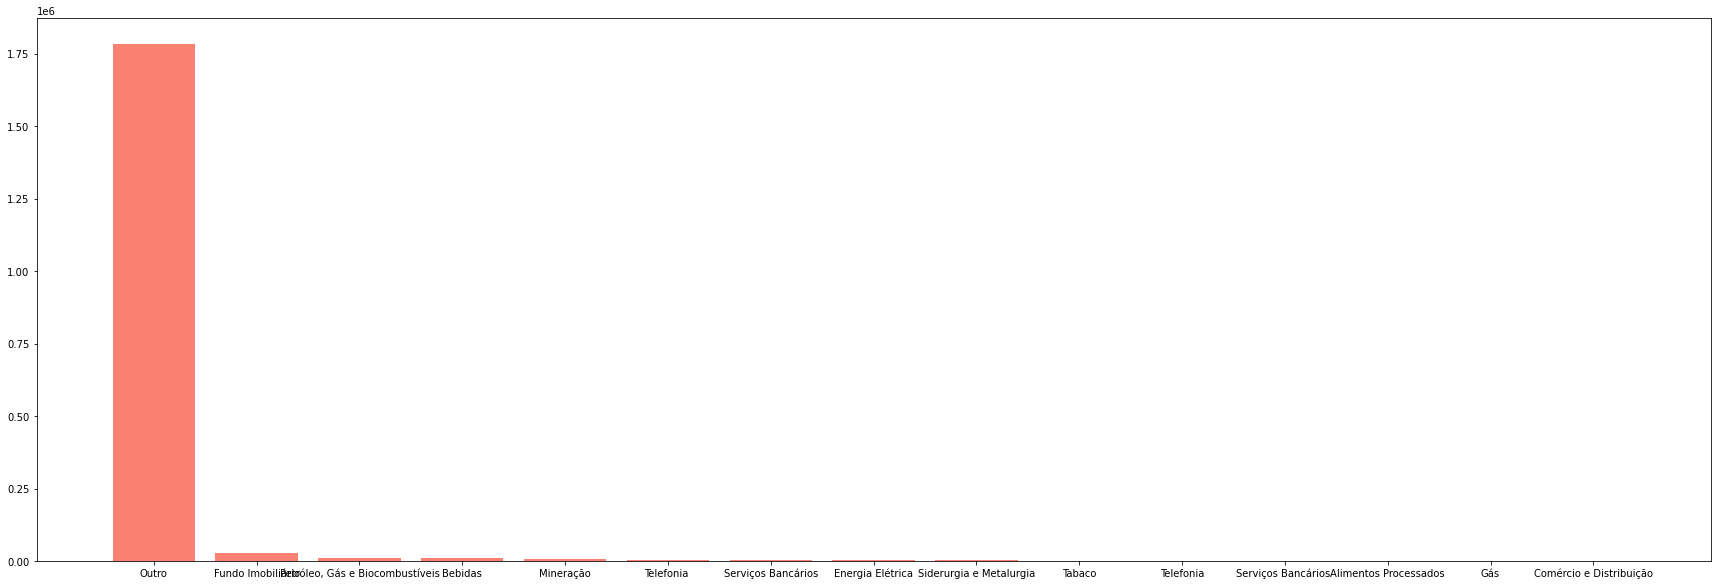

In [13]:
data_2008_largest_fechamento = data_2008.nlargest(50, '12')

empresa = data_2008_largest_fechamento['Segmento']
dezembro = data_2008_largest_fechamento['12']

fig = plt.figure(figsize =(30, 10))
plt.bar(empresa, dezembro, facecolor = 'salmon')
plt.show()

## Menores valores de fechamento dos segmentos em 2008

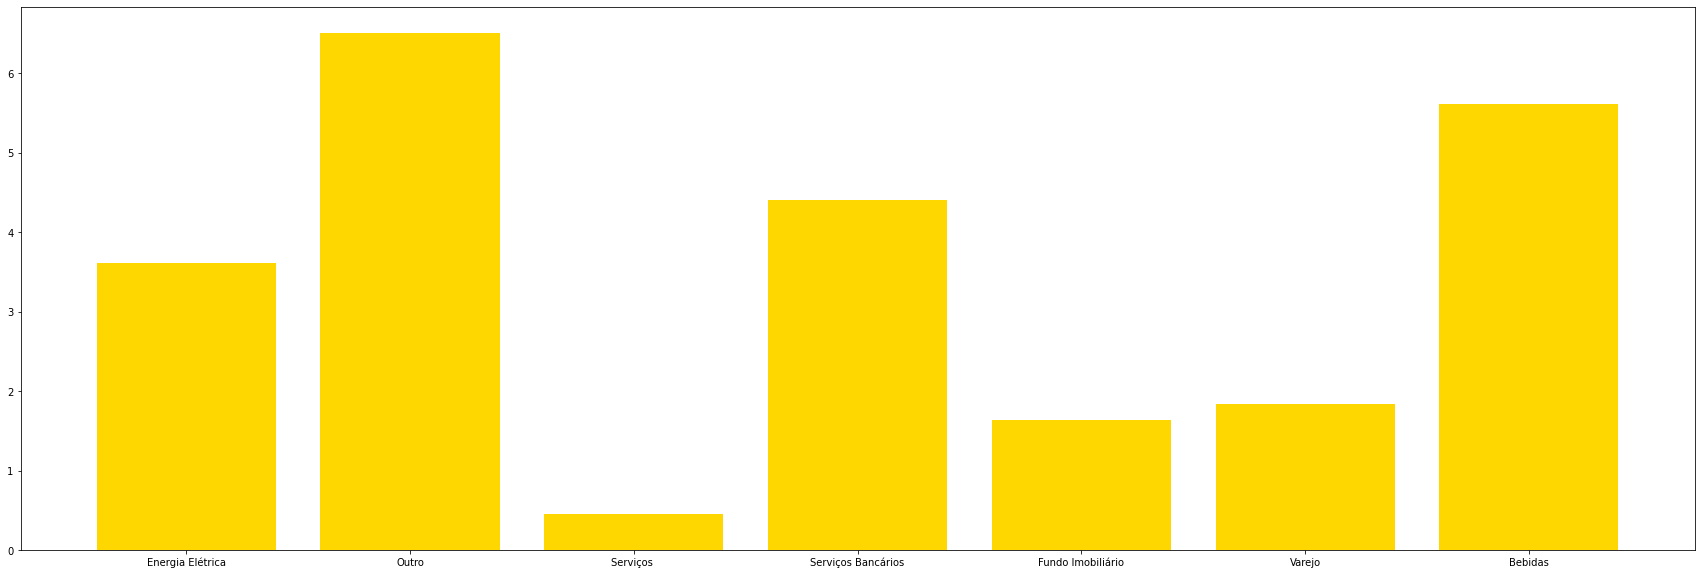

In [14]:
data_2008_lowest_fechamento = data_2008.nsmallest(50, '12')

empresa = data_2008_lowest_fechamento['Segmento']
dezembro = data_2008_lowest_fechamento['12']

fig = plt.figure(figsize =(30, 10))
plt.bar(empresa, dezembro, facecolor = 'gold')
plt.show()

## Calculando volatilidade e adicionando a coluna 

In [15]:
data_2008['Volatilidade'] = data_2008['12'] - data_2008['1'] 
data_2008.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
0,Agropecuária,SLC AGRICOLA,805.76,857.33,986.26,1370.22,1506.47,1452.53,1512.72,1061.17,983.34,553.59,440.39,534.04,-271.72
1,Alimentos Processados,JBS,540.32,525.45,572.65,512.72,947.97,1086.89,635.88,602.70,529.88,317.53,235.28,282.80,-257.52
2,Alimentos Processados,M.DIASBRANCO,1166.72,784.78,738.87,1005.23,1020.48,945.18,1066.60,906.34,867.62,627.59,646.34,569.36,-597.36
3,Alimentos Processados,MARFRIG,643.68,614.66,698.37,820.90,918.35,951.75,870.35,821.69,650.92,620.69,341.63,312.64,-331.04
4,Alimentos Processados,MINERVA,526.27,427.73,357.20,429.53,612.59,495.95,342.40,346.40,284.47,117.70,85.87,77.00,-449.27


## Analisando qual empresa mais desvalorizou em 2008

In [16]:
data_2008_lowest = data_2008.nsmallest(20, 'Volatilidade')
data_2008_lowest.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
223,Outro,BR BROKERS,56419.10,31536.11,28024.51,30997.73,29699.73,43444.18,28403.84,5059.35,223.33,111.33,72.47,42.10,-56377.00
149,Mineração,MMX MINER,47262.47,39592.72,56793.19,21168.99,5045.71,4913.37,3817.09,1089.97,978.83,380.20,299.80,203.50,-47058.97
610,Serviços Bancários,MERC BRASIL,38696.35,726.51,630.98,886.97,689.41,778.47,646.49,449.32,503.93,344.78,397.96,332.78,-38363.57
534,"Petróleo, Gás e Biocombustíveis",PETROBRAS,32641.17,26339.42,39639.91,32988.13,22847.75,26705.96,23493.56,16420.20,15075.21,12347.57,7819.69,7671.11,-24970.06
162,Mineração,USIMINAS,21154.90,18888.91,21699.17,26457.23,21629.20,22761.15,23305.12,28417.70,17212.82,8524.09,4970.23,5062.73,-16092.17


<AxesSubplot:xlabel='Empresa'>

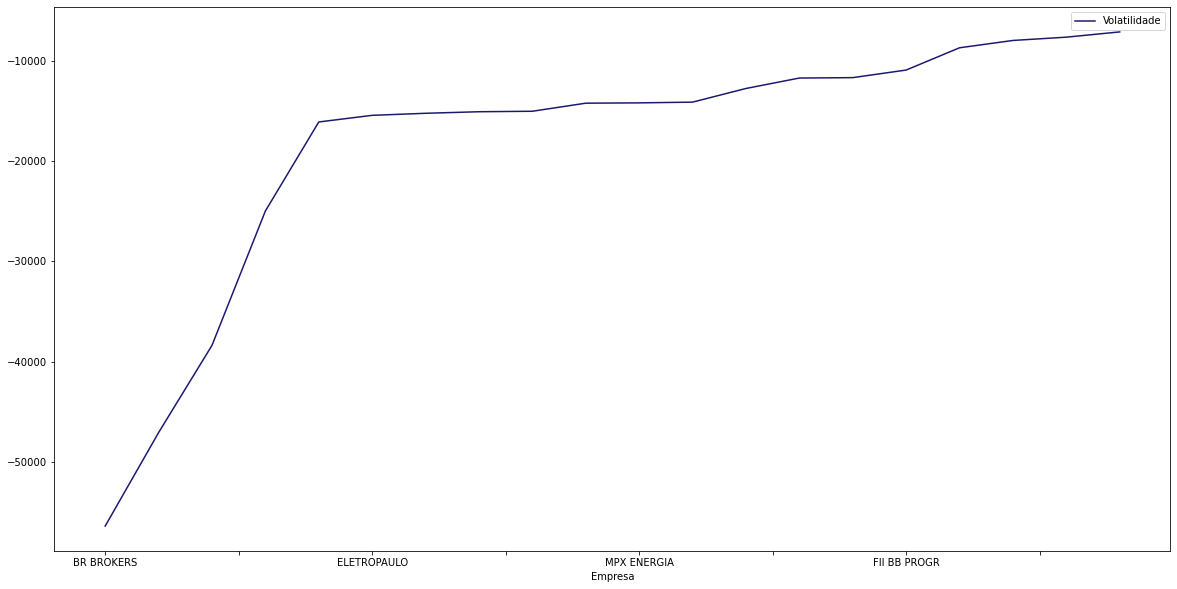

In [17]:
data_2008_lowest.plot(x='Empresa', y='Volatilidade', figsize=(20, 10), color = 'midnightblue') 

## Analisando a variância da BR BROKERS em 2008

In [18]:
data_brokers = data_2008_lowest[data_2008_lowest['Empresa'].str.contains('BR BROKERS')]
data_brokers = data_brokers.nsmallest(1, 'Volatilidade')
data_brokers = data_brokers.drop(['Segmento', 'Volatilidade'], axis=1)
data_brokers.head()

,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
223,BR BROKERS,56419.1,31536.11,28024.51,30997.73,29699.73,43444.18,28403.84,5059.35,223.33,111.33,72.47,42.1


<AxesSubplot:xlabel='Empresa'>

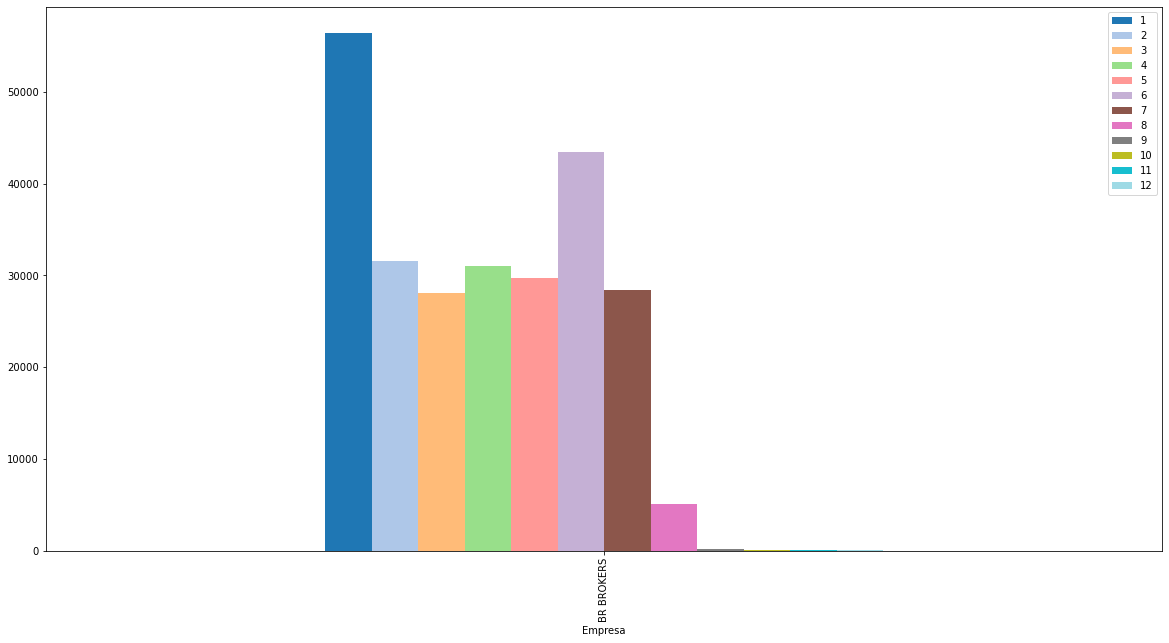

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
data_brokers.plot.bar(x='Empresa', ax=ax, colormap = "tab20")

## Analisando qual empresa mais valorizou em 2008

In [20]:
data_2008_largest = data_2008.nlargest(20, 'Volatilidade')
data_2008_largest.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
343,Outro,IBOVE,236234.55,306908.03,285511.08,352072.65,132504.11,695488.50,417120.89,1440328.15,633436.97,2372775.89,321026.01,1785228.99,1548994.44
342,Outro,IBOV,274439.53,1276556.45,431892.97,1355620.09,876272.92,1158023.64,314099.29,279791.42,325975.76,297974.10,234048.14,626351.82,351912.29
119,Fundo Imobiliário,FII CRIANCA,421.00,652.90,1125.02,922.00,673.10,460.00,1119.90,1095.00,878.00,1095.49,180.10,1980.23,1559.23
655,Telefonia,VIVO,1100.35,1161.31,1067.42,1245.29,1223.06,1300.84,1199.45,975.78,979.20,1702.33,1855.38,2438.76,1338.41
529,"Petróleo, Gás e Biocombustíveis",PETRE,733.00,1959.58,1061.92,1236.94,1234.88,1765.18,2276.01,2473.48,2423.74,3233.01,2251.46,1643.22,910.22


<AxesSubplot:xlabel='Empresa'>

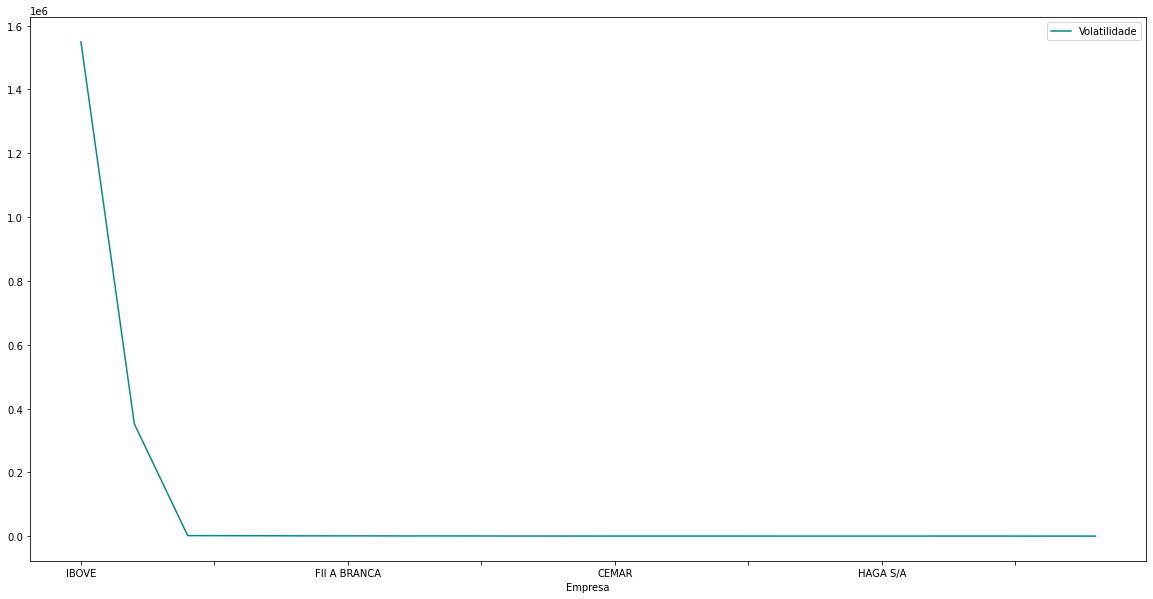

In [21]:
data_2008_largest.plot(x='Empresa', y='Volatilidade', figsize=(20, 10), color = 'darkcyan') 

## Analisando a variância da IBOVE em 2008

In [22]:
data_ibove = data_2008_largest[data_2008_largest['Empresa'].str.contains("IBOVE")]
data_ibove = data_ibove.nlargest(1, 'Volatilidade')
data_ibove = data_ibove.drop(['Segmento', 'Volatilidade'], axis=1)
data_ibove.head()

,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
343,IBOVE,236234.55,306908.03,285511.08,352072.65,132504.11,695488.5,417120.89,1440328.15,633436.97,2372775.89,321026.01,1785228.99


<AxesSubplot:xlabel='Empresa'>

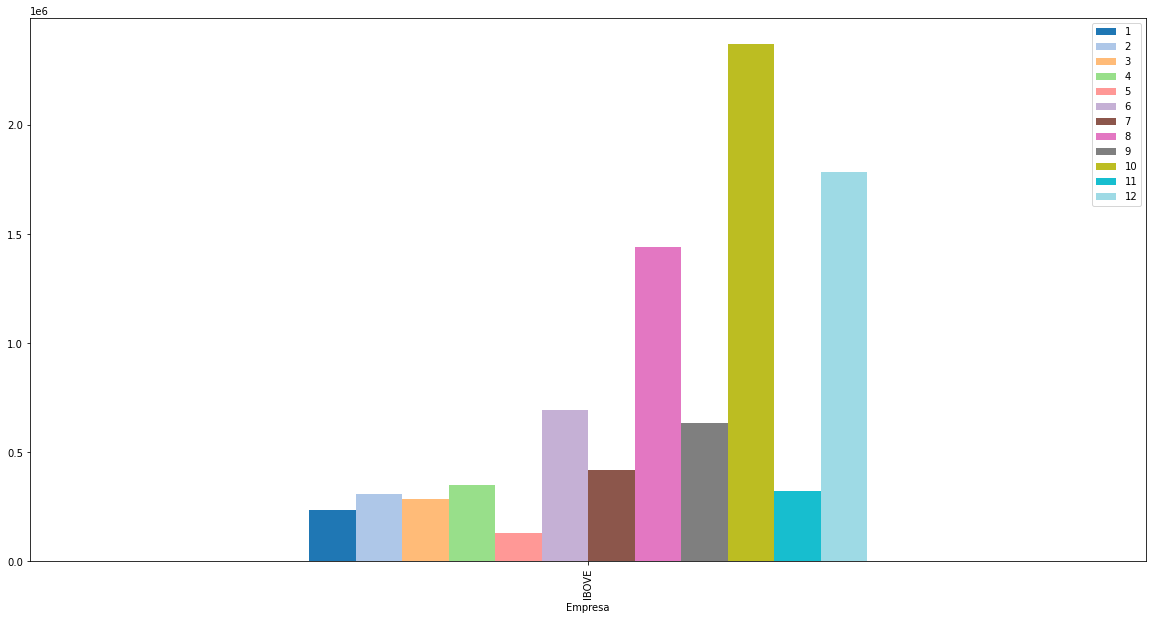

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
data_ibove.plot.bar(x='Empresa', ax=ax, colormap = "tab20")

## Analisando segmentos que mais valorizaram em 2008

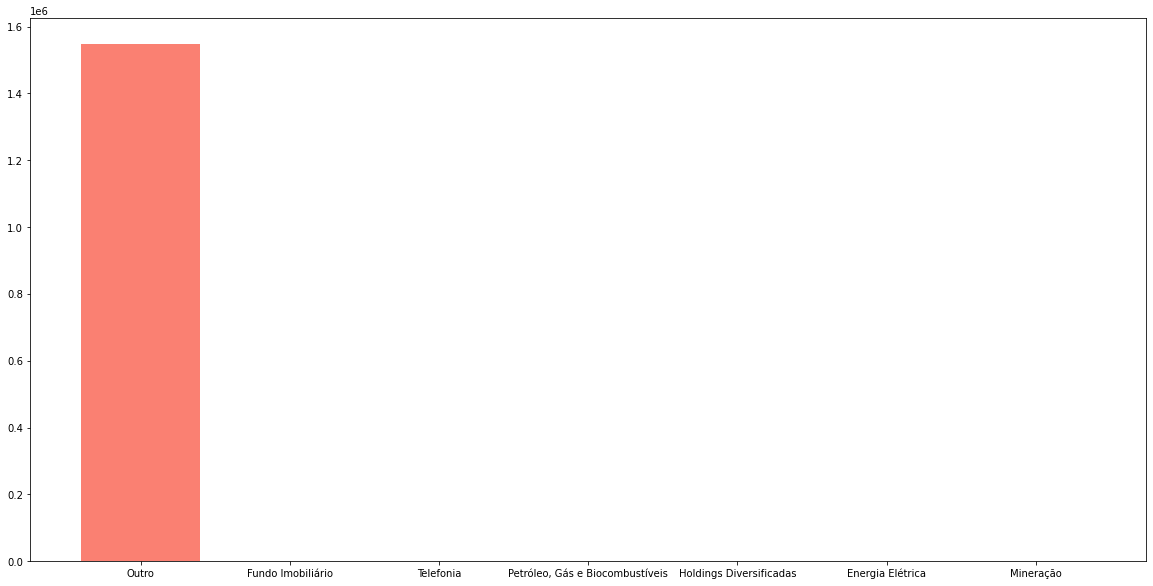

In [24]:
segmento = data_2008_largest['Segmento']
volatilidade = data_2008_largest['Volatilidade']

fig = plt.figure(figsize =(20, 10))
plt.bar(segmento[0:20], volatilidade[0:20],facecolor = 'salmon')
plt.show()

## Analisando segmentos que mais desvalorizaram em 2008

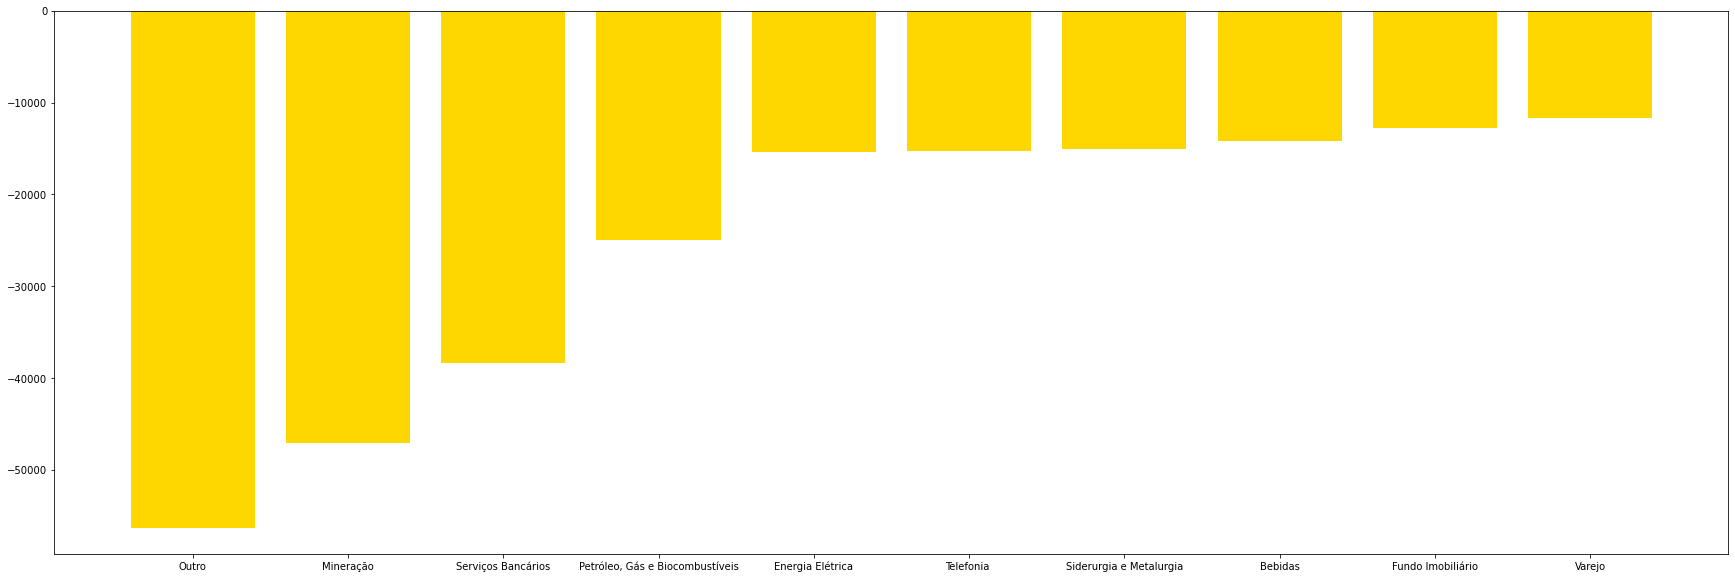

In [25]:
segmento = data_2008_lowest['Segmento']
volatilidade = data_2008_lowest['Volatilidade']

fig = plt.figure(figsize =(30, 10))
plt.bar(segmento[0:20], volatilidade[0:20], facecolor = 'gold')
plt.show()

## Correlação 2008

In [26]:
data_2008_cor = data_2008.copy()
data_2008_cor['Segmento'] = data_2008_cor['Segmento'].astype('category').cat.codes
data_2008_cor['Segmento']

0       0
1       1
2       1
3       1
4       1
       ..
682    61
683    61
684    61
685    61
686    61
Name: Segmento, Length: 687, dtype: int8

In [27]:
data_2008_cor['Empresa'] = data_2008_cor['Empresa'].astype('category').cat.codes
data_2008_cor['Empresa']

0      575
1      379
2      421
3      427
4      447
      ... 
682    395
683    396
684    397
685    398
686    399
Name: Empresa, Length: 687, dtype: int16

In [28]:
correlations = data_2008_cor.corr()
data_2008_cor.corr()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
Segmento,1.000000,0.032304,0.000928,0.000667,0.001913,0.000103,0.000851,0.000793,0.005189,-0.001193,-0.000237,0.001503,-0.008009,-0.000734,-0.000330
Empresa,0.032304,1.000000,-0.011575,-0.004082,-0.002855,-0.004115,-0.000315,-0.000580,0.002041,-0.002403,-0.006629,-0.005083,-0.008371,-0.002769,-0.002147
1,0.000928,-0.011575,1.000000,0.859683,0.978214,0.865235,0.822686,0.949077,0.955105,0.752193,0.893691,0.705806,0.939039,0.824407,0.740823
2,0.000667,-0.004082,0.859683,1.000000,0.931529,0.999570,0.995094,0.953277,0.767493,0.413318,0.650676,0.350105,0.758164,0.539520,0.435711
3,0.001913,-0.002855,0.978214,0.931529,1.000000,0.935911,0.899694,0.987067,0.936724,0.690174,0.862561,0.638387,0.925340,0.781316,0.694856
4,0.000103,-0.004115,0.865235,0.999570,0.935911,1.000000,0.993639,0.958903,0.778871,0.429997,0.664597,0.367325,0.769819,0.554981,0.452692
5,0.000851,-0.000315,0.822686,0.995094,0.899694,0.993639,1.000000,0.923847,0.714082,0.333266,0.584401,0.267853,0.701153,0.464252,0.355340
6,0.000793,-0.000580,0.949077,0.953277,0.987067,0.958903,0.923847,1.000000,0.921824,0.667756,0.848343,0.614969,0.916667,0.767068,0.685082
7,0.005189,0.002041,0.955105,0.767493,0.936724,0.778871,0.714082,0.921824,1.000000,0.892153,0.981240,0.857401,0.993707,0.941657,0.892601
8,-0.001193,-0.002403,0.752193,0.413318,0.690174,0.429997,0.333266,0.667756,0.892153,1.000000,0.959108,0.997081,0.902328,0.988720,0.994911


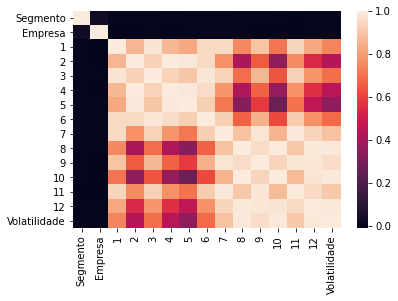

In [29]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlations)
plt.show()

## Naive Bayes Classification Model

In [30]:
data_2008_model = data_2008.copy()
data_2008_model.shape #before removing NaN

(687, 15)

In [31]:
data_2008_model['improve'] = np.where(data_2008_model['Volatilidade'] >= 0, True, False)
data_2008_model.dropna(inplace=True) # substituir o NaN, pq ha mais de 3600 linhas com NaN!!! TODO
data_2008_model.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade,improve
0,Agropecuária,SLC AGRICOLA,805.76,857.33,986.26,1370.22,1506.47,1452.53,1512.72,1061.17,983.34,553.59,440.39,534.04,-271.72,False
1,Alimentos Processados,JBS,540.32,525.45,572.65,512.72,947.97,1086.89,635.88,602.70,529.88,317.53,235.28,282.80,-257.52,False
2,Alimentos Processados,M.DIASBRANCO,1166.72,784.78,738.87,1005.23,1020.48,945.18,1066.60,906.34,867.62,627.59,646.34,569.36,-597.36,False
3,Alimentos Processados,MARFRIG,643.68,614.66,698.37,820.90,918.35,951.75,870.35,821.69,650.92,620.69,341.63,312.64,-331.04,False
4,Alimentos Processados,MINERVA,526.27,427.73,357.20,429.53,612.59,495.95,342.40,346.40,284.47,117.70,85.87,77.00,-449.27,False


In [32]:
data_2008_model.shape #after removing NaN

(360, 16)

In [33]:
X = data_2008_model.iloc[:,0:15].values
X

array([['Agropecuária', 'SLC AGRICOLA', 805.76, ..., 440.39, 534.04,
        -271.72],
       ['Alimentos Processados', 'JBS', 540.32, ..., 235.28, 282.8,
        -257.52000000000004],
       ['Alimentos Processados', 'M.DIASBRANCO', 1166.72, ..., 646.34,
        569.36, -597.36],
       ...,
       ['Transportes', 'LOG-IN', 887.15, ..., 245.59, 270.21, -616.94],
       ['Transportes', 'MARCOPOLO', 533.07, ..., 236.25, 207.72, -325.35],
       ['Varejo', 'B2W VAREJO', 13207.69, ..., 1371.14, 1535.75,
        -11671.94]], dtype=object)

In [34]:
y = data_2008_model.loc[:,'improve'].values
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [35]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
#creating labelEncoder
le = LabelEncoder()
# Converting string labels into numbers.
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
X[:,0] = le.fit_transform(X[:,0])
X

array([[0, 'SLC AGRICOLA', 805.76, ..., 440.39, 534.04, -271.72],
       [1, 'JBS', 540.32, ..., 235.28, 282.8, -257.52000000000004],
       [1, 'M.DIASBRANCO', 1166.72, ..., 646.34, 569.36, -597.36],
       ...,
       [53, 'LOG-IN', 887.15, ..., 245.59, 270.21, -616.94],
       [53, 'MARCOPOLO', 533.07, ..., 236.25, 207.72, -325.35],
       [54, 'B2W VAREJO', 13207.69, ..., 1371.14, 1535.75, -11671.94]],
      dtype=object)

In [37]:
X[:,1] = le.fit_transform(X[:,1])
X

array([[0, 294, 805.76, ..., 440.39, 534.04, -271.72],
       [1, 189, 540.32, ..., 235.28, 282.8, -257.52000000000004],
       [1, 210, 1166.72, ..., 646.34, 569.36, -597.36],
       ...,
       [53, 204, 887.15, ..., 245.59, 270.21, -616.94],
       [53, 213, 533.07, ..., 236.25, 207.72, -325.35],
       [54, 25, 13207.69, ..., 1371.14, 1535.75, -11671.94]], dtype=object)

## Let's go to split the dataset into Training and Test set with 80:20 ratio

In [38]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13) # 70% training and 30% test

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()
# or scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
#Train the model using the training sets
model.fit(X_train, y_train)
GaussianNB(priors = None)
#Predict the response for test dataset
y_pred = model.predict(X_test) # y_pred holds the predicted label of our test set.

In [41]:
### Let's see the accuracy of our estimator.

In [42]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8611111111111112


# Pandemia 2020

## Lendo arquivos cotação 2020

In [43]:
data_url_1 = '2020_1_Cotação.csv'
data_2020_1 = pd.read_csv(data_url_1, header='infer', error_bad_lines=False, sep=';')

data_2020_1['Abertura'] = data_2020_1['Abertura'].str.replace(',','.')
data_2020_1['Abertura'] = data_2020_1['Abertura'].astype(float)

data_2020_1.head()

,Empresa,Mês,Abertura,Segmento
0,3M,1,4615.67,BDR
1,3M,10,4920.62,BDR
2,3M,11,4636.61,BDR
3,3M,12,4481.61,BDR
4,3M,2,3621.99,BDR


In [44]:
data_2020_1 = data_2020_1.pivot_table(index=['Segmento', 'Empresa'], columns='Mês', values='Abertura')


print("Total de Linhas: ",data_2020_1.shape[0])


data_2020_1.head()

Total de Linhas:  2078


Mês                             1        2        3        4        5   \
Segmento     Empresa                                                     
Agropecuária POMIFRUTAS     461.82   178.94   132.53   213.34   181.22   
             SLC AGRICOLA  2771.00  1962.87  1479.26  1609.84  1873.52   
             SLCE            23.00      NaN     1.24     0.47      NaN   
             SLCE    /ED       NaN      NaN      NaN      NaN    23.61   
             SLCEE            1.40      NaN    10.70     0.70      NaN   

Mês                             6        7        8        9        10  \
Segmento     Empresa                                                     
Agropecuária POMIFRUTAS     212.72   227.68   192.35   193.88   187.18   
             SLC AGRICOLA  2336.17  2497.16  2014.70  1529.36  1929.30   
             SLCE            20.61     5.00     1.50    47.59     0.45   
             SLCE    /ED       NaN      NaN      NaN      NaN      NaN   
             SLCEE             NaN      NaN      NaN      NaN      NaN   

Mês                             11       12  
Segmento     Empresa                         
Agropecuária POMIFRUTAS     200.11   237.63  
             SLC AGRICOLA  1040.19  1080.84  
             SLCE              NaN      NaN  
             SLCE    /ED       NaN      NaN  
             SLCEE             NaN      NaN

In [45]:
data_url_2 = '2020_2_Cotação.csv'

data_2020_2 = pd.read_csv(data_url_2, header='infer', error_bad_lines=False, sep=';')

data_2020_2['Abertura'] = data_2020_2['Abertura'].str.replace(',','.')
data_2020_2['Abertura'] = data_2020_2['Abertura'].astype(float)

data_2020_2.head()

,Empresa,Abertura,Mês,Segmento
0,3M,4920.62,10,BDR
1,3M,4636.61,11,BDR
2,3M,4481.61,12,BDR
3,3R PETROLEUM,607.62,11,"Petróleo, Gás e Biocombustíveis"
4,3R PETROLEUM,1920.29,12,"Petróleo, Gás e Biocombustíveis"


In [46]:
data_2020_2 = data_2020_2.pivot_table(index=['Segmento', 'Empresa'], columns='Mês', values='Abertura')


print("Total de Linhas: ",data_2020_2.shape[0])


data_2020_2.head()

Total de Linhas:  1854


Mês                    10     11    12
Segmento Empresa                      
#N/D     ALSO         NaN   1.92  0.50
         AMAR         NaN    NaN  0.51
         ARZZ    /EDJ NaN   3.00   NaN
         ARZZE    /ED NaN   1.05   NaN
         BEEF    /ED  NaN  14.73   NaN

In [47]:
data_2020 = pd.concat([data_2020_1,data_2020_2])

print("Total de Linhas: ",data_2020.shape[0])

data_2020.head()

Total de Linhas:  3932


Mês                             1        2        3        4        5   \
Segmento     Empresa                                                     
Agropecuária POMIFRUTAS     461.82   178.94   132.53   213.34   181.22   
             SLC AGRICOLA  2771.00  1962.87  1479.26  1609.84  1873.52   
             SLCE            23.00      NaN     1.24     0.47      NaN   
             SLCE    /ED       NaN      NaN      NaN      NaN    23.61   
             SLCEE            1.40      NaN    10.70     0.70      NaN   

Mês                             6        7        8        9        10  \
Segmento     Empresa                                                     
Agropecuária POMIFRUTAS     212.72   227.68   192.35   193.88   187.18   
             SLC AGRICOLA  2336.17  2497.16  2014.70  1529.36  1929.30   
             SLCE            20.61     5.00     1.50    47.59     0.45   
             SLCE    /ED       NaN      NaN      NaN      NaN      NaN   
             SLCEE             NaN      NaN      NaN      NaN      NaN   

Mês                             11       12  
Segmento     Empresa                         
Agropecuária POMIFRUTAS     200.11   237.63  
             SLC AGRICOLA  1040.19  1080.84  
             SLCE              NaN      NaN  
             SLCE    /ED       NaN      NaN  
             SLCEE             NaN      NaN

## Tratando e convertendo os dados de valores

## Fazendo transposição

In [48]:
data_2020.to_csv('2020.csv')

## Visualizando nova tabela transposta

In [49]:
data_url = '2020.csv'
data_2020 = pd.read_csv(data_url, header='infer', error_bad_lines=False, sep=',',)
print("Total de Linhas: ",data_2020.shape[0])
data_2020.head()

Total de Linhas:  3932


,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
0,Agropecuária,POMIFRUTAS,461.82,178.94,132.53,213.34,181.22,212.72,227.68,192.35,193.88,187.18,200.11,237.63
1,Agropecuária,SLC AGRICOLA,2771.00,1962.87,1479.26,1609.84,1873.52,2336.17,2497.16,2014.70,1529.36,1929.30,1040.19,1080.84
2,Agropecuária,SLCE,23.00,NaN,1.24,0.47,NaN,20.61,5.00,1.50,47.59,0.45,NaN,NaN
3,Agropecuária,SLCE /ED,NaN,NaN,NaN,NaN,23.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agropecuária,SLCEE,1.40,NaN,10.70,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Maiores valores de abertura das empresas em 2020

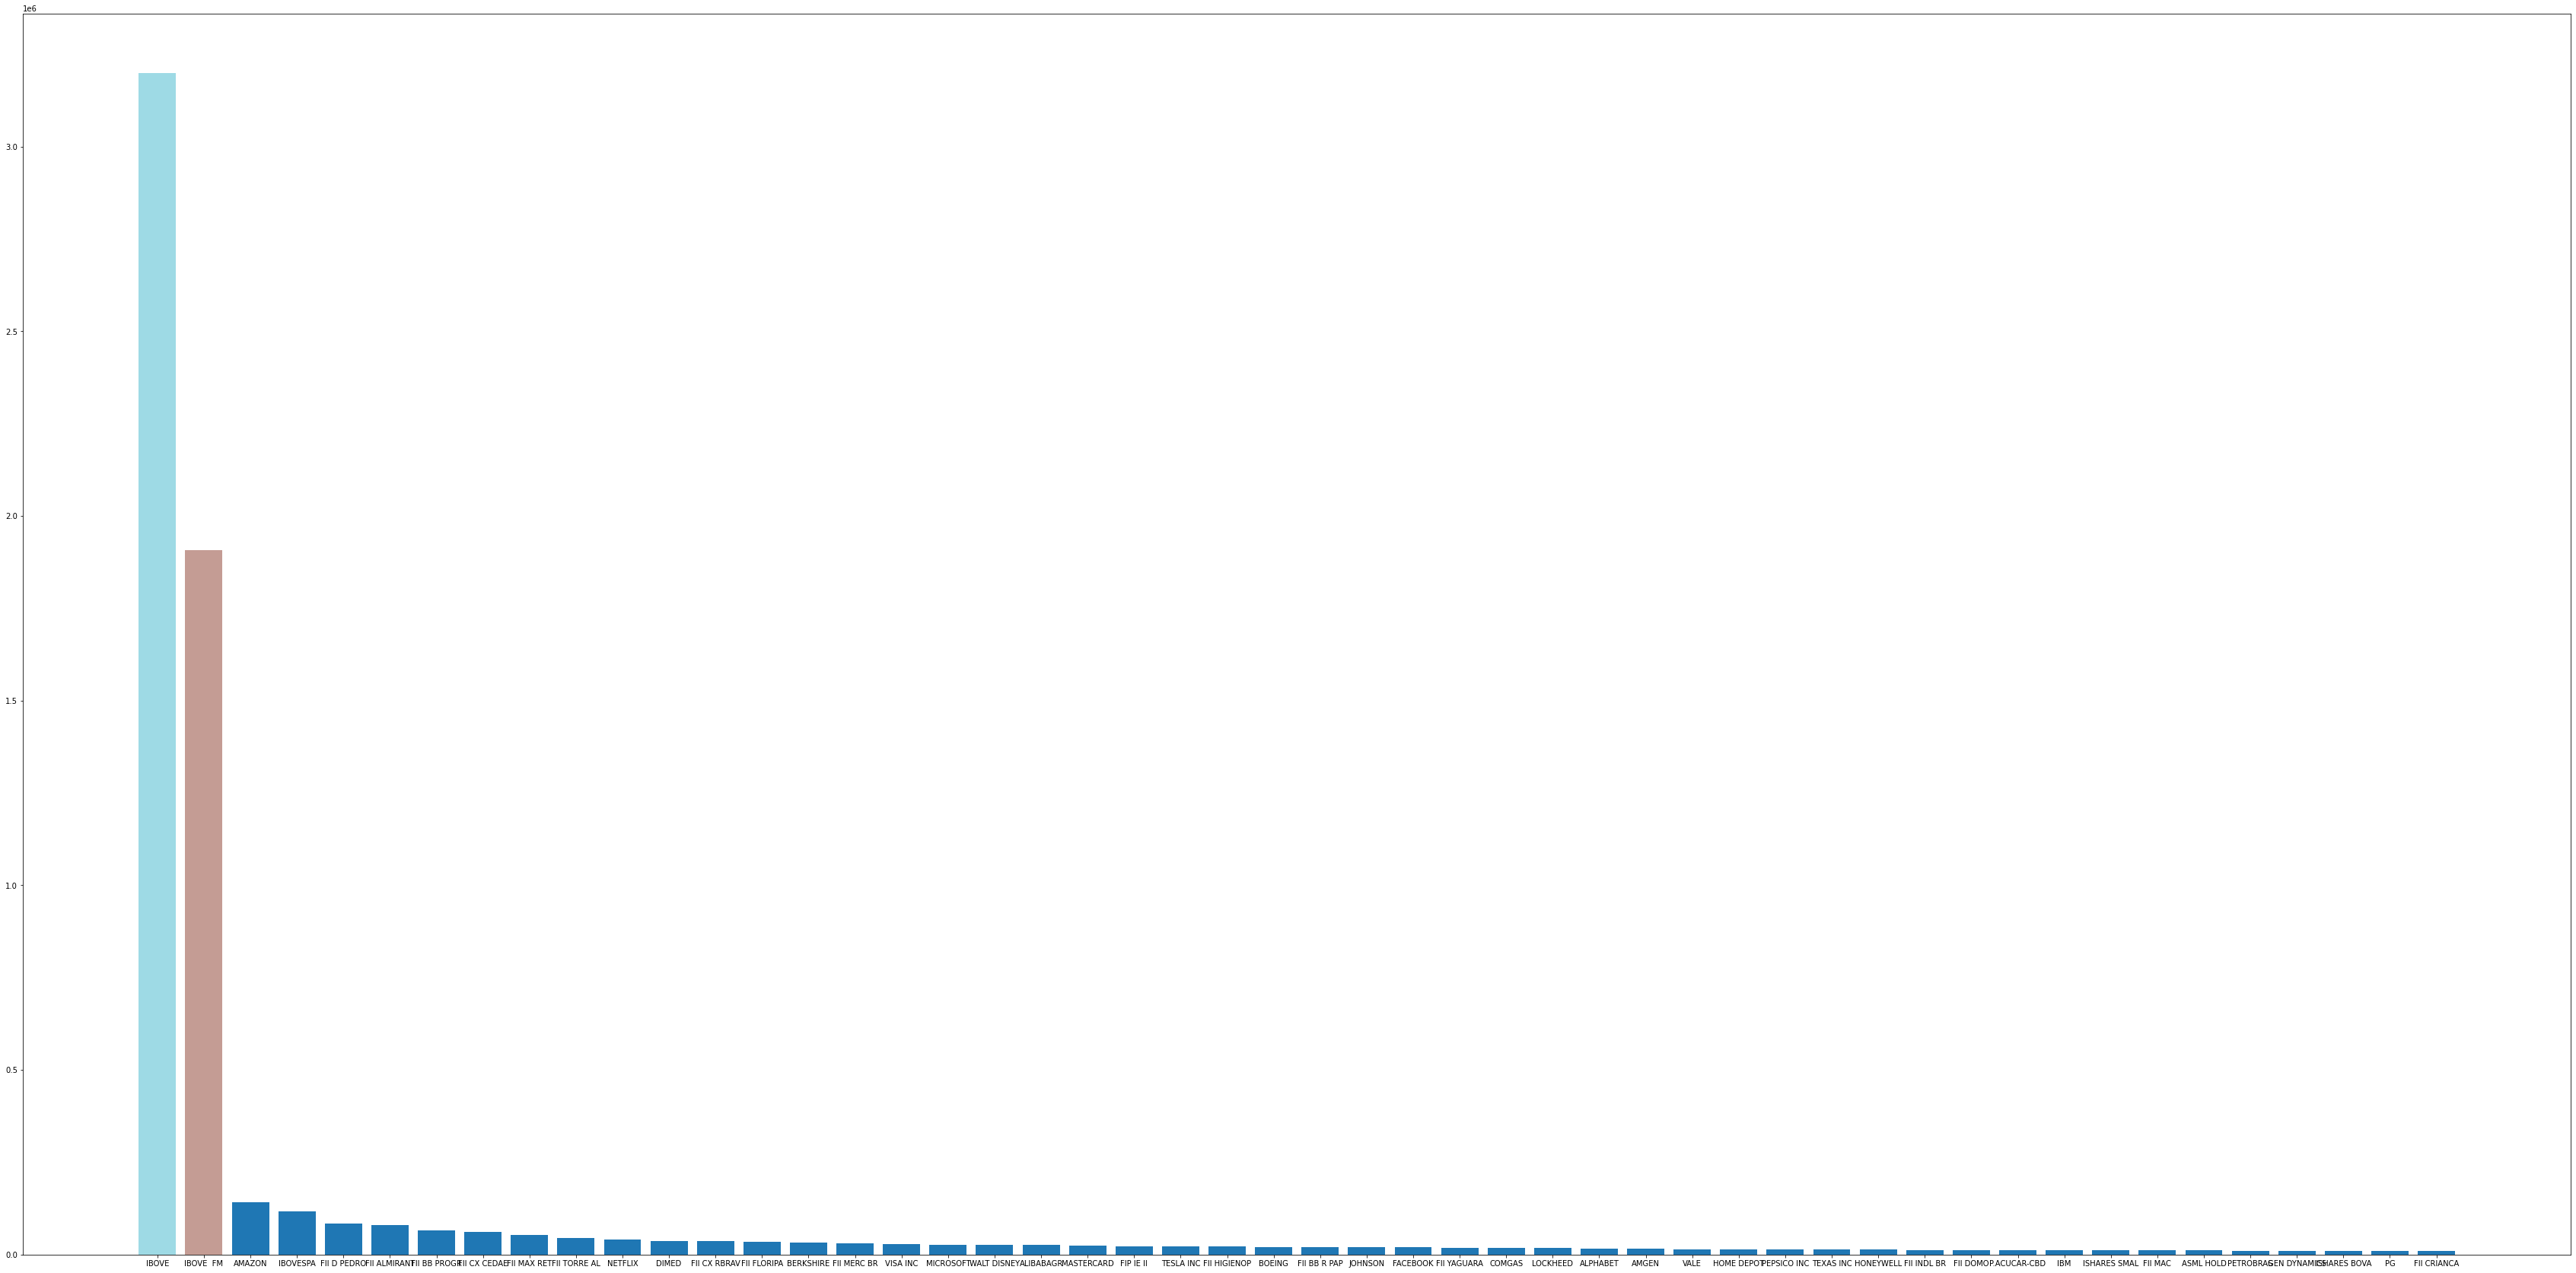

In [50]:
data_2020_largest_abertura = data_2020.nlargest(50, '1')

empresa = data_2020_largest_abertura['Empresa']
janeiro = data_2020_largest_abertura['1']

fmy_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, janeiro, color=my_cmap(rescale(janeiro)))
plt.show()

## Menores valores de abertura das empresas em 2020

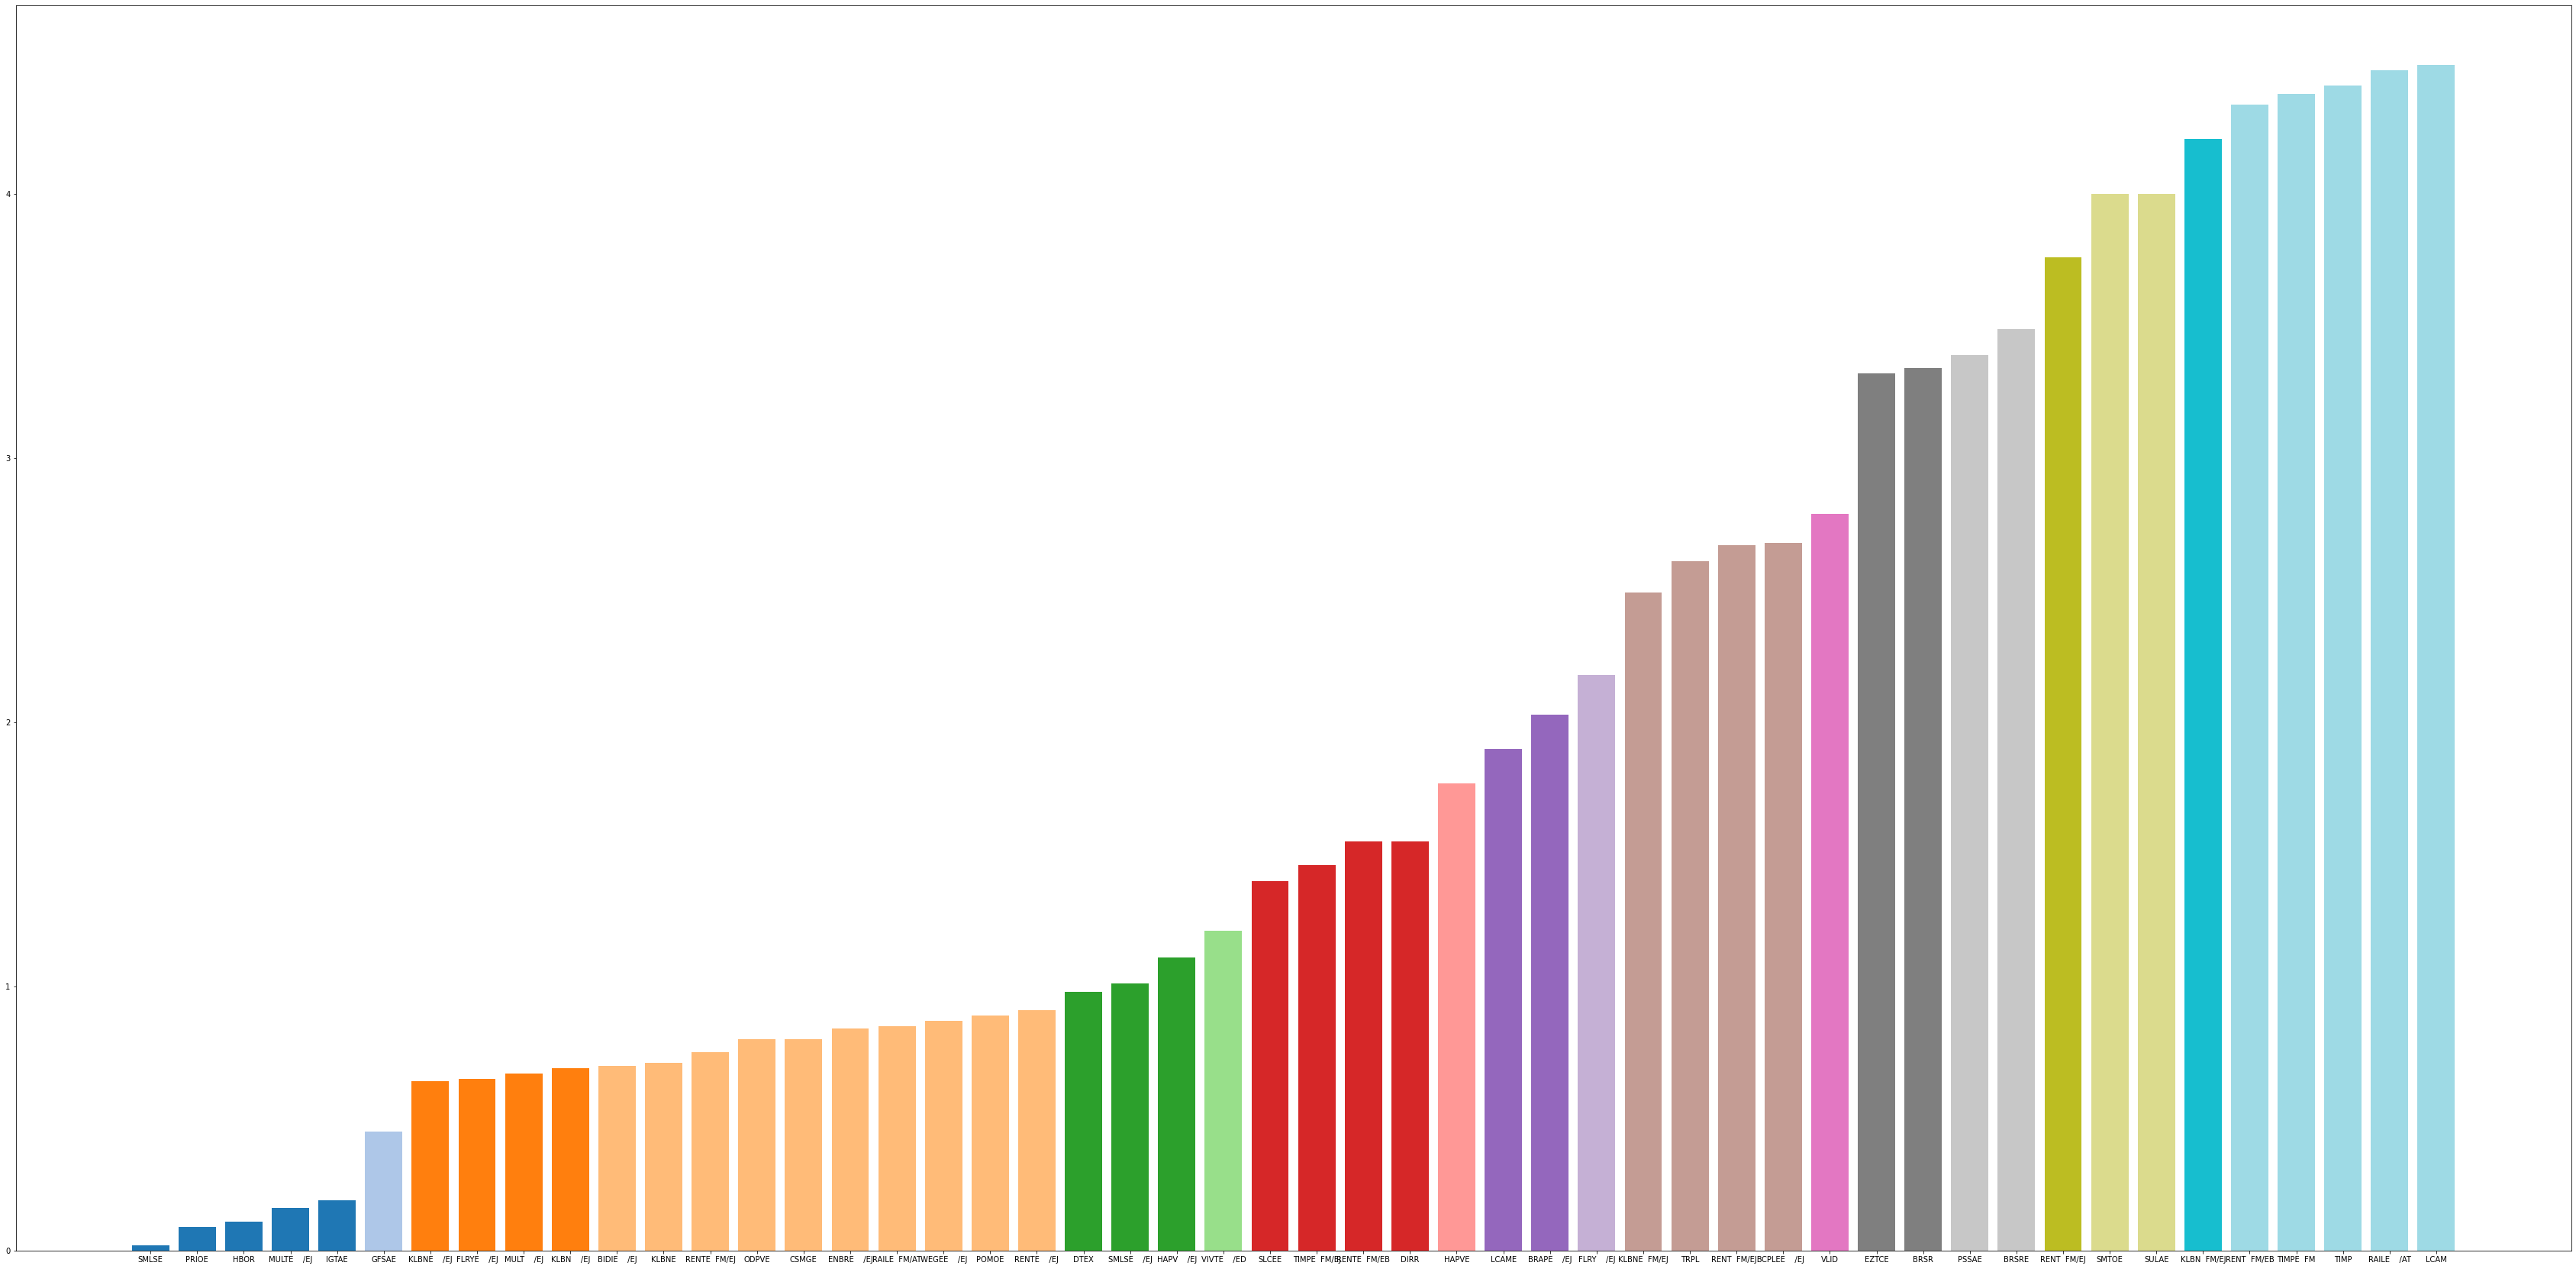

In [51]:
data_2020_lowest_abertura = data_2020.nsmallest(50, '1')

empresa = data_2020_lowest_abertura['Empresa']
janeiro = data_2020_lowest_abertura['1']

fmy_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, janeiro, color=my_cmap(rescale(janeiro)))
plt.show()

## Menores valores de abertura dos segmentos em 2020

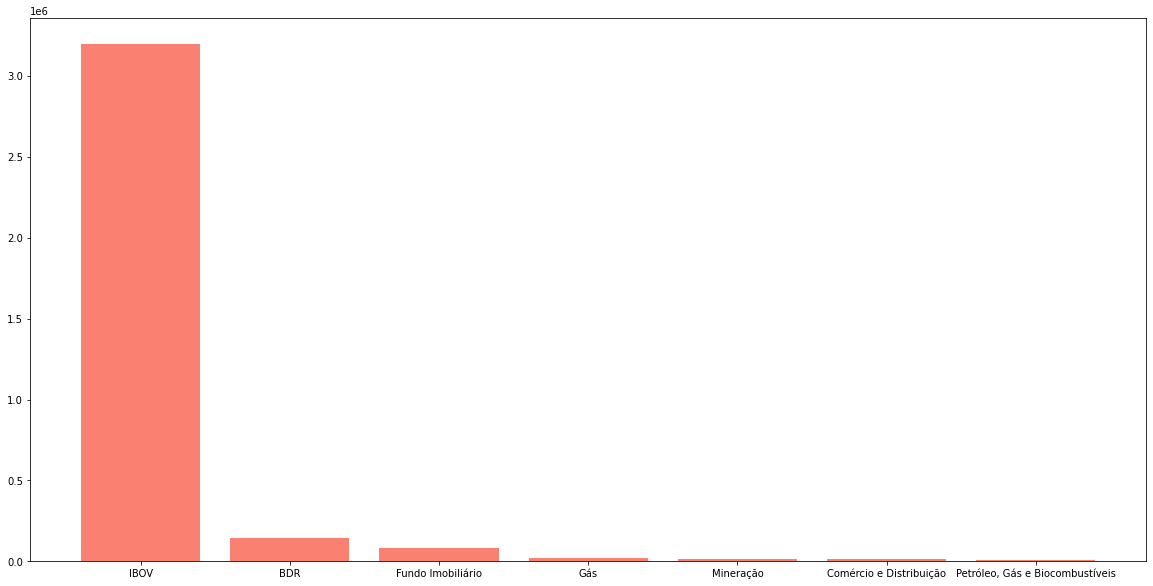

In [52]:
data_2020_largest_abertura = data_2020.nlargest(50, '1')

empresa = data_2020_largest_abertura['Segmento']
janeiro = data_2020_largest_abertura['1']

fig = plt.figure(figsize =(20, 10))
plt.bar(empresa, janeiro, facecolor = 'salmon')
plt.show()

## Maiores valores de abertura dos segmentos em 2020

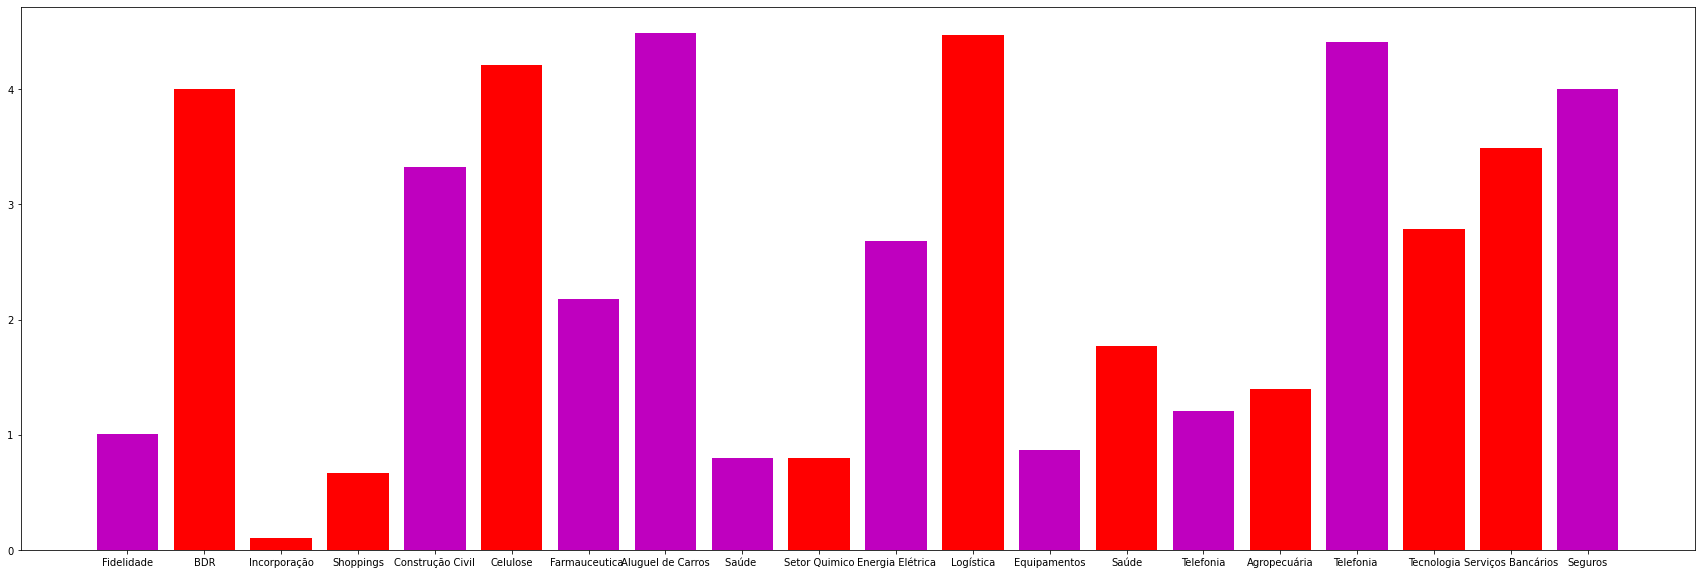

In [53]:
data_2020_lowest_abertura = data_2020.nsmallest(50, '1')

empresa = data_2020_lowest_abertura['Segmento']
janeiro = data_2020_lowest_abertura['1']

fig = plt.figure(figsize =(30, 10))
plt.bar(empresa, janeiro, color = 'rm')
plt.show()

## Maiores valores de fechamento das empresas em 2020

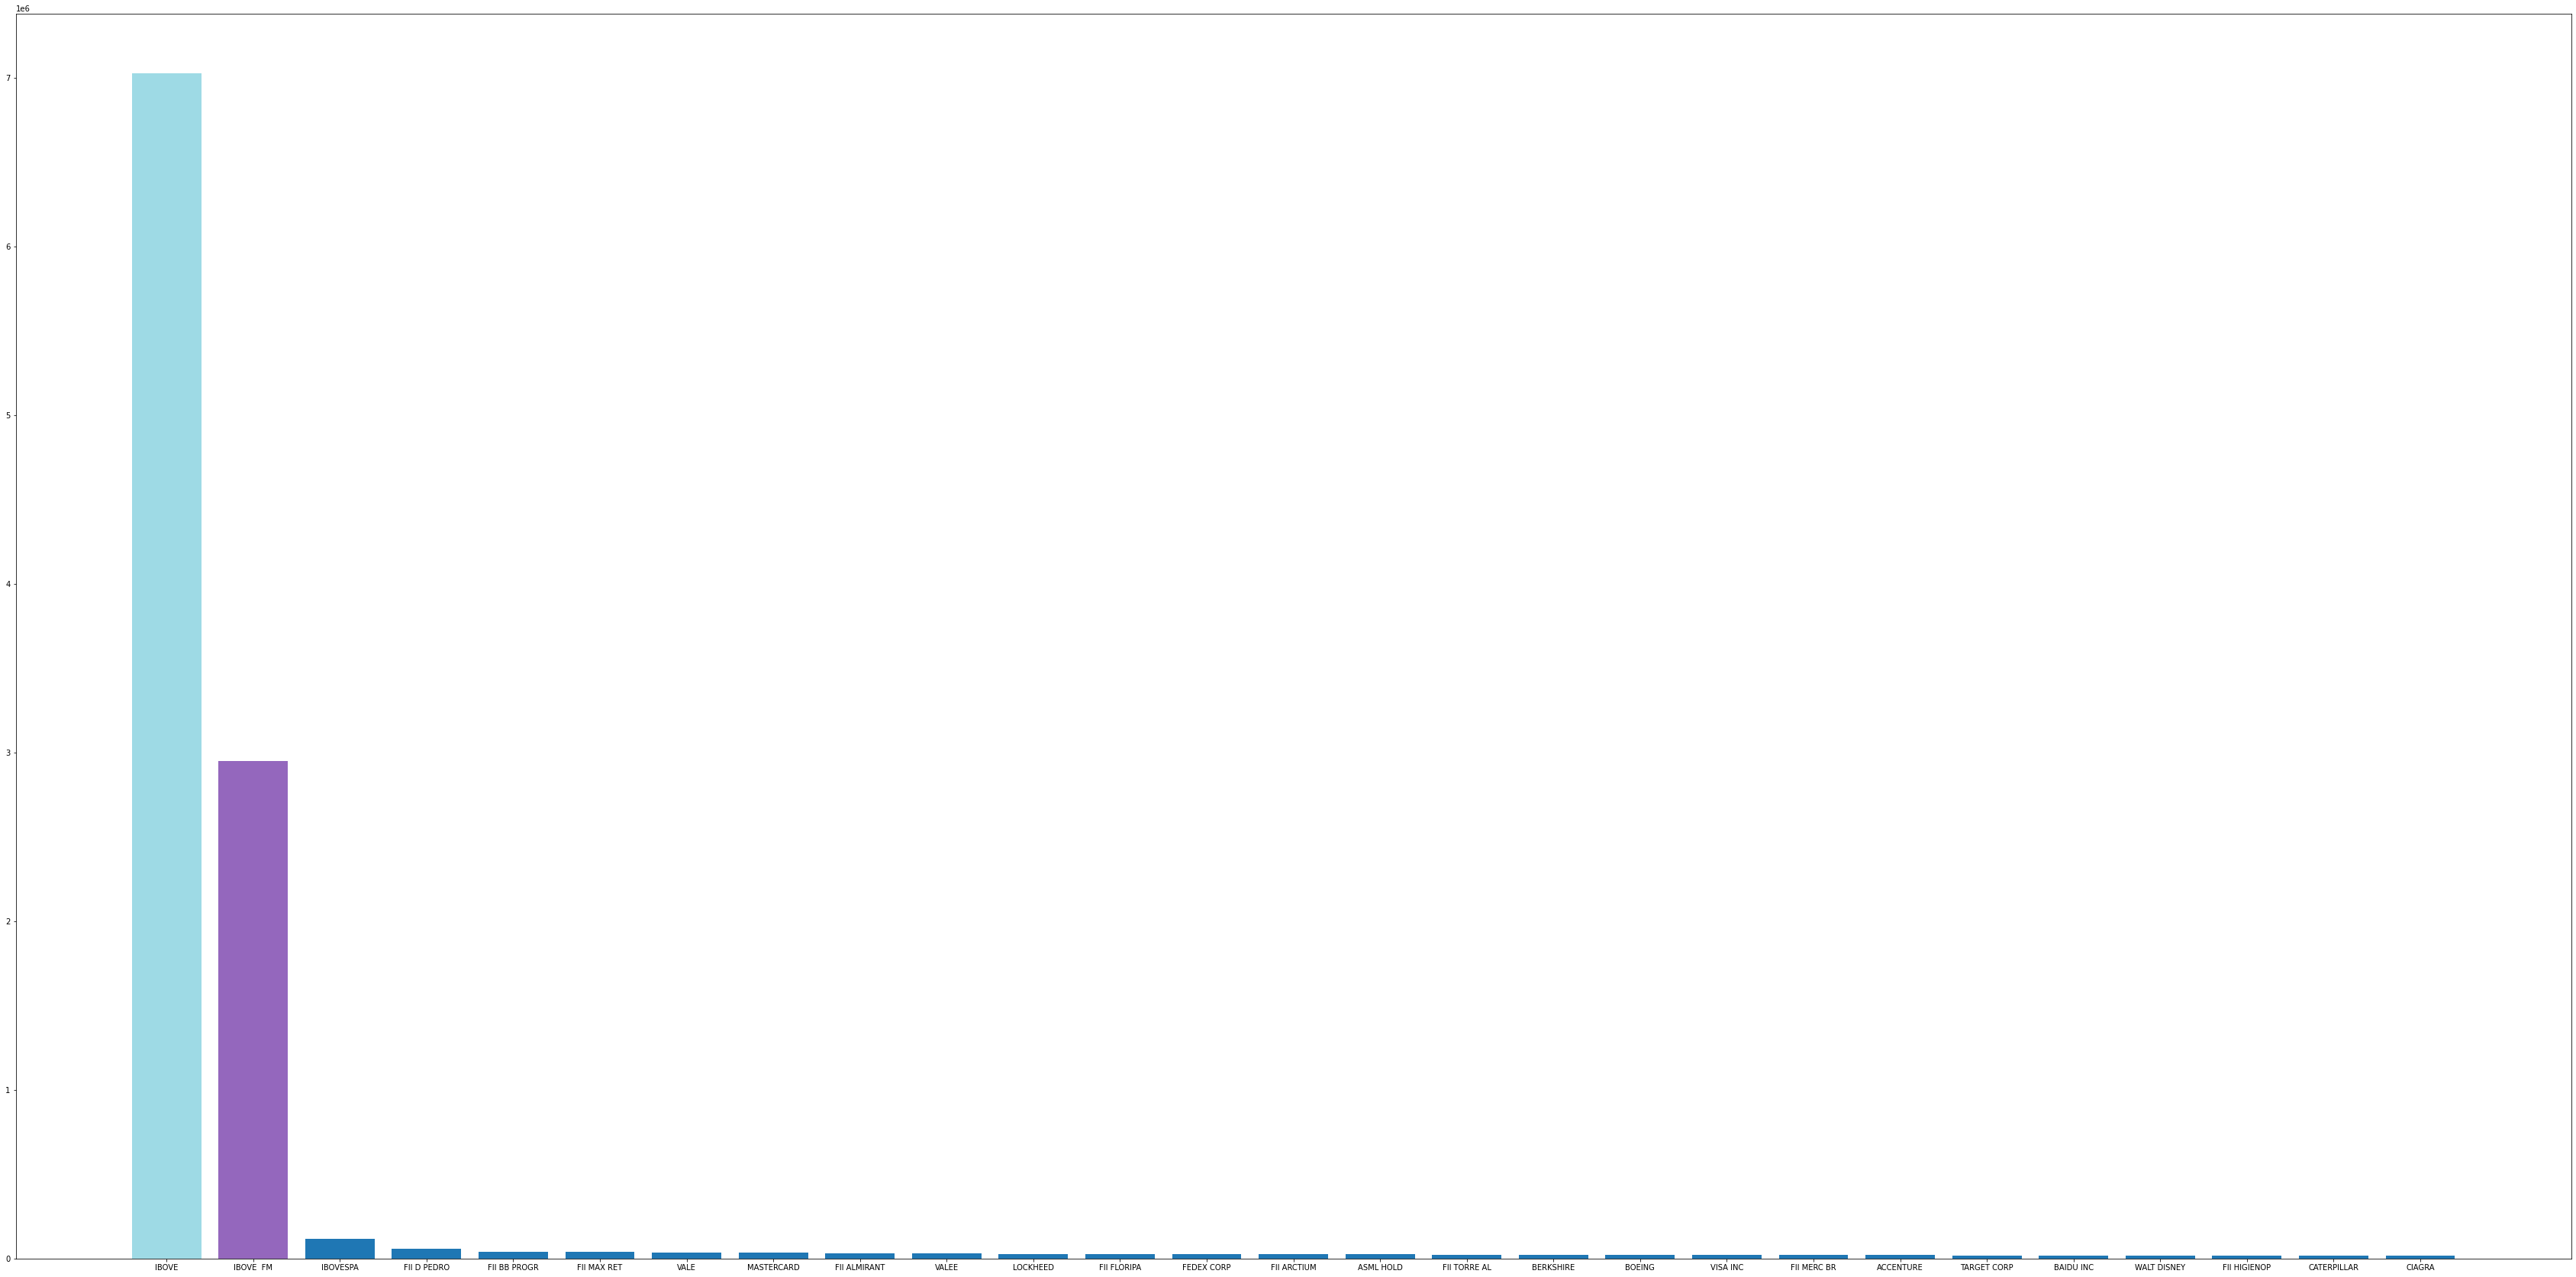

In [54]:
data_2020_largest_fechamento = data_2020.nlargest(50, '12')

empresa = data_2020_largest_fechamento['Empresa']
dezembro = data_2020_largest_fechamento['12']

fmy_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, dezembro, color=my_cmap(rescale(dezembro)))
plt.show()

## Menores valores de fechamento das empresas em 2020

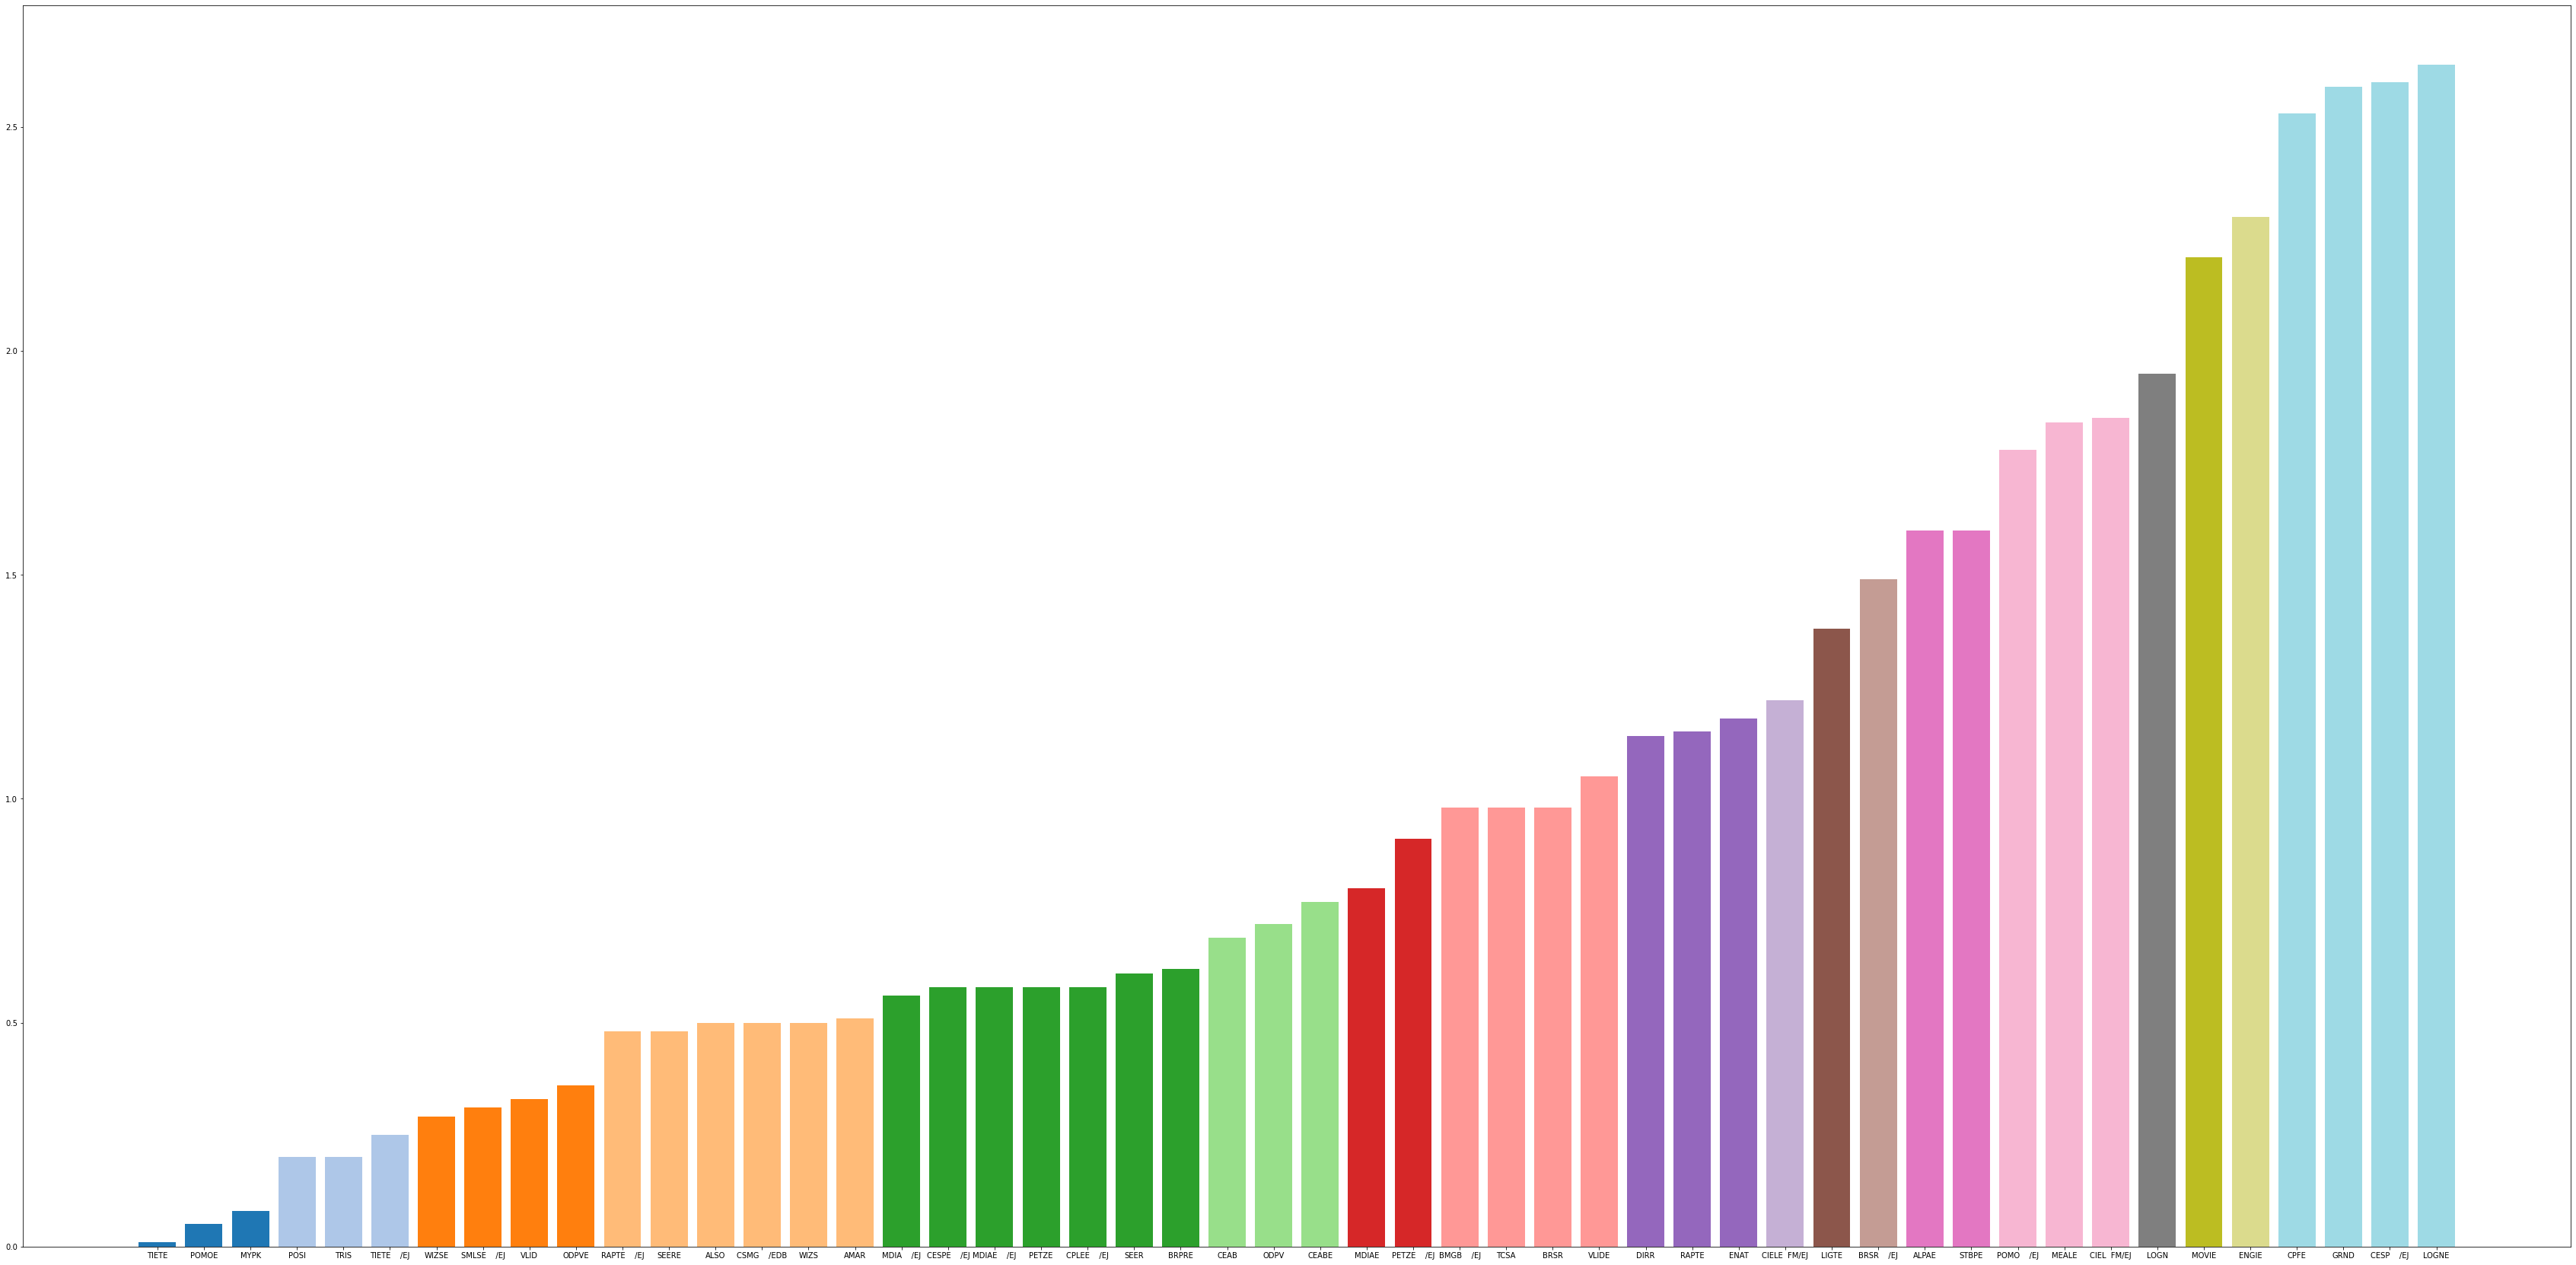

In [55]:
data_2020_lowest_fechamento = data_2020.nsmallest(50, '12')

empresa = data_2020_lowest_fechamento['Empresa']
dezembro = data_2020_lowest_fechamento['12']

fmy_cmap = plt.get_cmap("tab20")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.figure(figsize =(60, 30))
plt.bar(empresa, dezembro, color=my_cmap(rescale(dezembro)))
plt.show()

## Maiores valores de fechamento dos segmentos em 2020

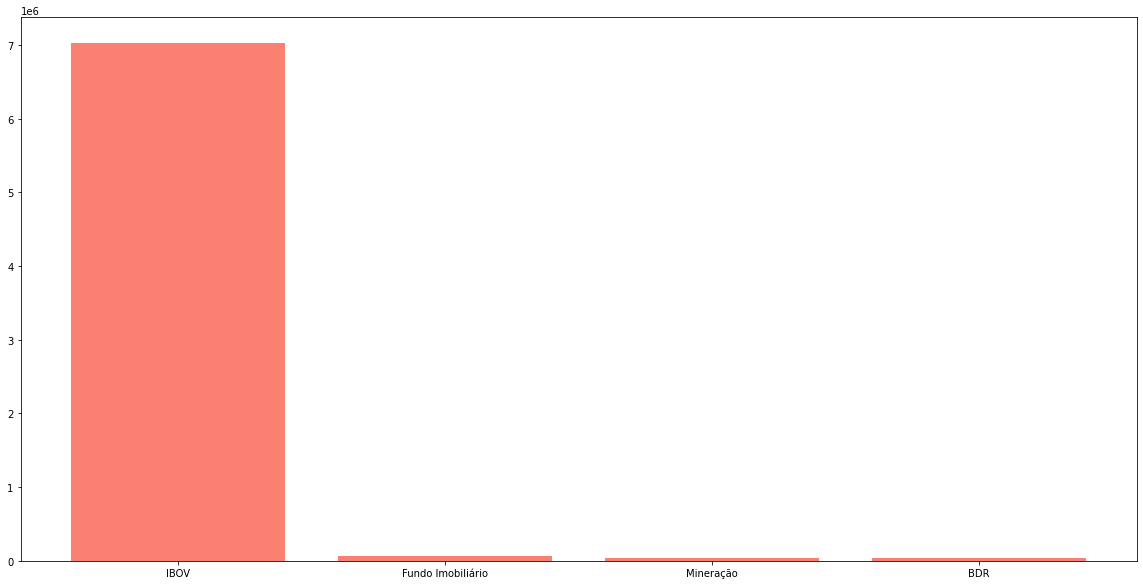

In [56]:
data_2020_largest_fechamento = data_2020.nlargest(50, '12')

empresa = data_2020_largest_fechamento['Segmento']
dezembro = data_2020_largest_fechamento['12']

fig = plt.figure(figsize =(20, 10))
plt.bar(empresa, dezembro, facecolor = 'salmon')
plt.show()

## Menores valores de fechamento dos segmentos em 2020

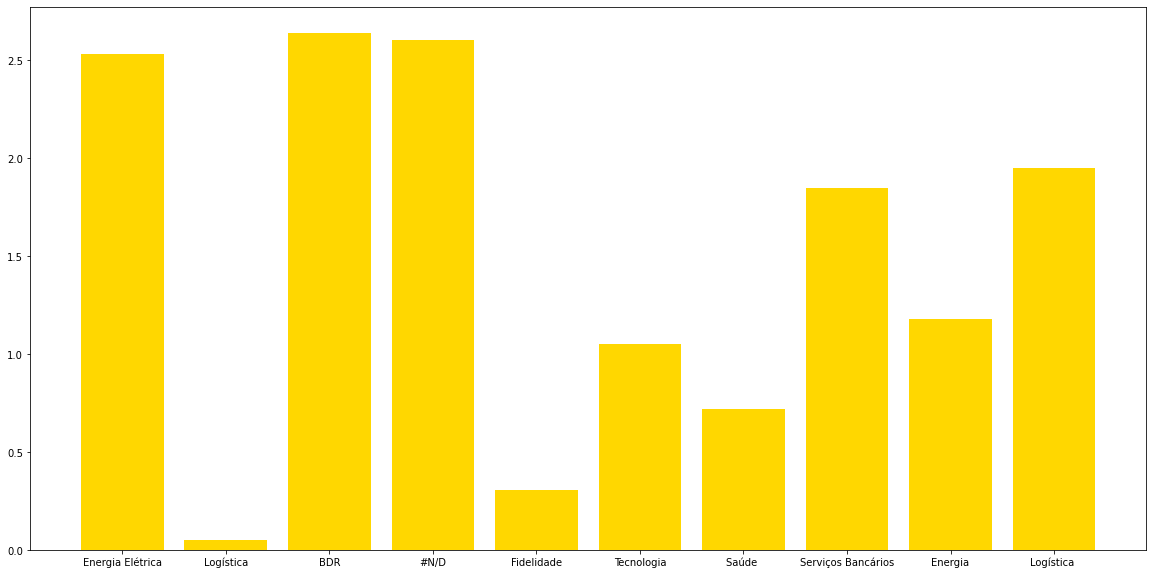

In [57]:
data_2020_lowest_fechamento = data_2020.nsmallest(50, '12')

empresa = data_2020_lowest_fechamento['Segmento']
dezembro = data_2020_lowest_fechamento['12']

fig = plt.figure(figsize =(20, 10))
plt.bar(empresa, dezembro, facecolor = 'gold')
plt.show()

## Calculando volatilidade e adicionando a coluna 

In [58]:
data_2020['Volatilidade'] = data_2020['12'] - data_2020['1'] 
data_2020.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
0,Agropecuária,POMIFRUTAS,461.82,178.94,132.53,213.34,181.22,212.72,227.68,192.35,193.88,187.18,200.11,237.63,-224.19
1,Agropecuária,SLC AGRICOLA,2771.00,1962.87,1479.26,1609.84,1873.52,2336.17,2497.16,2014.70,1529.36,1929.30,1040.19,1080.84,-1690.16
2,Agropecuária,SLCE,23.00,NaN,1.24,0.47,NaN,20.61,5.00,1.50,47.59,0.45,NaN,NaN,NaN
3,Agropecuária,SLCE /ED,NaN,NaN,NaN,NaN,23.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agropecuária,SLCEE,1.40,NaN,10.70,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analisando qual empresa mais desvalorizou em 2020

In [59]:
data_2020_lowest = data_2020.nsmallest(20, 'Volatilidade')
data_2020_lowest.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
105,BDR,AMAZON,140980.37,149513.62,200176.26,237179.71,272122.52,285953.75,363647.80,372227.68,334540.20,191625.36,37803.15,2099.88,-138880.49
1340,Fundo Imobiliário,FII CX CEDAE,61000.23,46908.94,46742.35,44716.88,47543.35,51721.94,33536.21,2069.86,2104.05,2169.73,2125.53,2085.83,-58914.40
1293,Fundo Imobiliário,FII ALMIRANT,80948.74,54627.69,56076.00,55549.65,63846.00,74932.63,76205.40,64838.10,65785.97,58755.78,29270.94,30078.18,-50870.56
691,BDR,NETFLIX,41060.98,34289.24,61287.35,69771.41,86115.14,90981.72,111029.79,106478.44,104564.11,41952.80,1067.33,1061.89,-39999.09
335,BDR,DIMED,36850.59,37074.45,36421.67,2022.13,1826.55,2019.86,3435.70,2762.64,2699.45,2226.61,1608.91,1607.40,-35243.19


<AxesSubplot:xlabel='Empresa'>

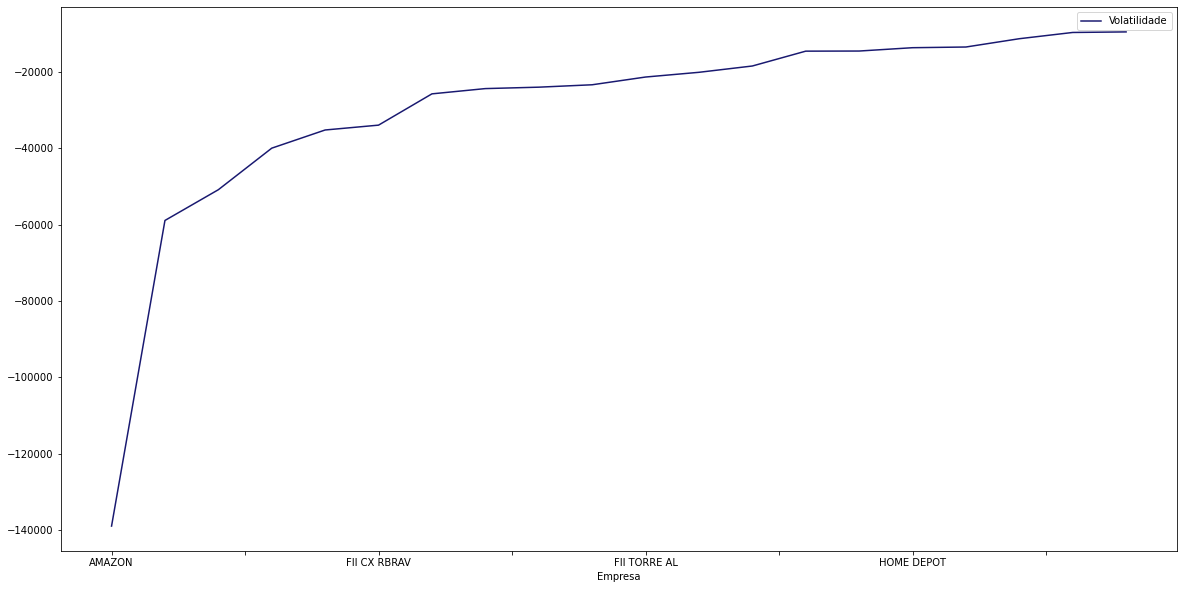

In [60]:
data_2020_lowest.plot(x='Empresa', y='Volatilidade', figsize=(20, 10), color = 'midnightblue') 

## Analisando a variância da Amazon em 2020

In [61]:
data_amazon = data_2020_lowest[data_2020_lowest['Empresa'].str.contains('AMAZON')]
data_amazon = data_amazon.nsmallest(1, 'Volatilidade')
data_amazon = data_amazon.drop(['Segmento', 'Volatilidade'], axis=1)
data_amazon.head()

,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
105,AMAZON,140980.37,149513.62,200176.26,237179.71,272122.52,285953.75,363647.8,372227.68,334540.2,191625.36,37803.15,2099.88


<AxesSubplot:xlabel='Empresa'>

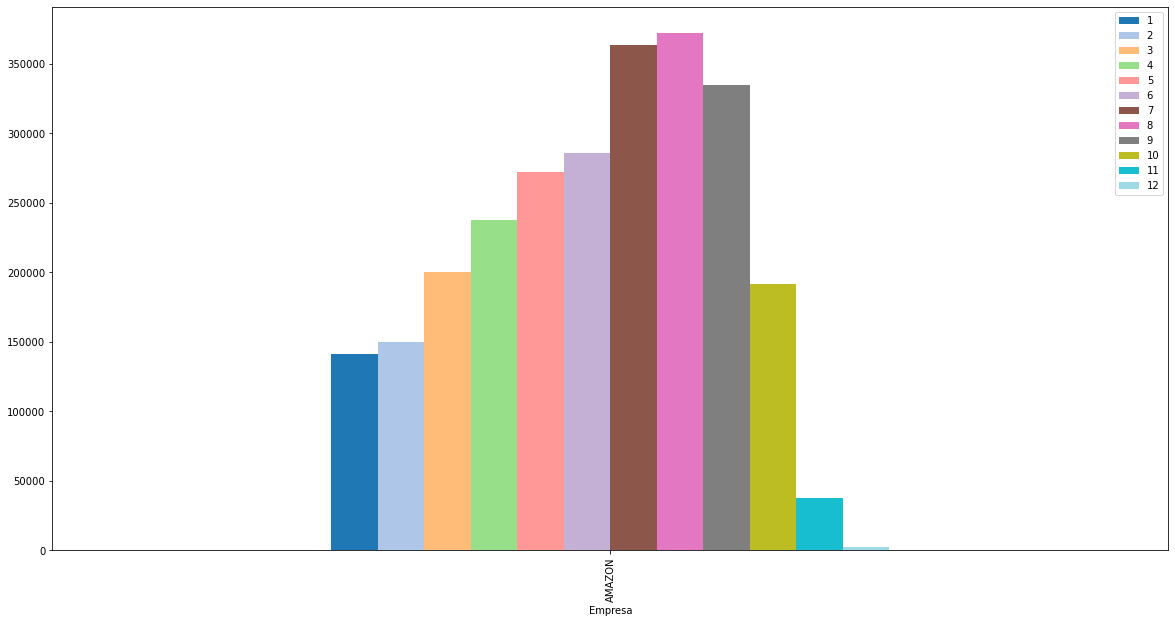

In [62]:
fig, ax = plt.subplots(figsize=(20,10))
data_amazon.plot.bar(x='Empresa', ax=ax, colormap='tab20')

## Analisando qual empresa mais valorizou em 2020

In [63]:
data_2020_largest = data_2020.nlargest(20, 'Volatilidade')
data_2020_largest.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
412,BDR,FEDEX CORP,1238.16,1324.69,2263.04,2713.46,5393.29,4931.94,2550.00,8673.68,23372.64,32257.52,30223.89,26351.42,25113.26
159,BDR,BAIDU INC,554.29,1083.35,NaN,1596.01,2948.75,4922.10,6574.16,6113.62,7344.76,11729.27,15320.22,17372.88,16818.59
1547,Fundo Imobiliário,FIP IE III,1601.01,14104.99,11305.09,9782.02,NaN,2955.00,9325.09,12315.02,6152.13,6066.18,11970.25,15103.86,13502.85
141,BDR,ASML HOLD,11032.39,8044.63,9763.61,13956.00,3527.26,8841.03,3940.62,24854.81,13385.49,12871.60,24927.33,24015.71,12983.32
868,BDR,TARGET CORP,6324.03,7507.26,9327.86,9491.73,10645.76,11183.67,11499.72,17784.60,17764.77,16289.89,14393.93,17915.97,11591.94


<AxesSubplot:xlabel='Empresa'>

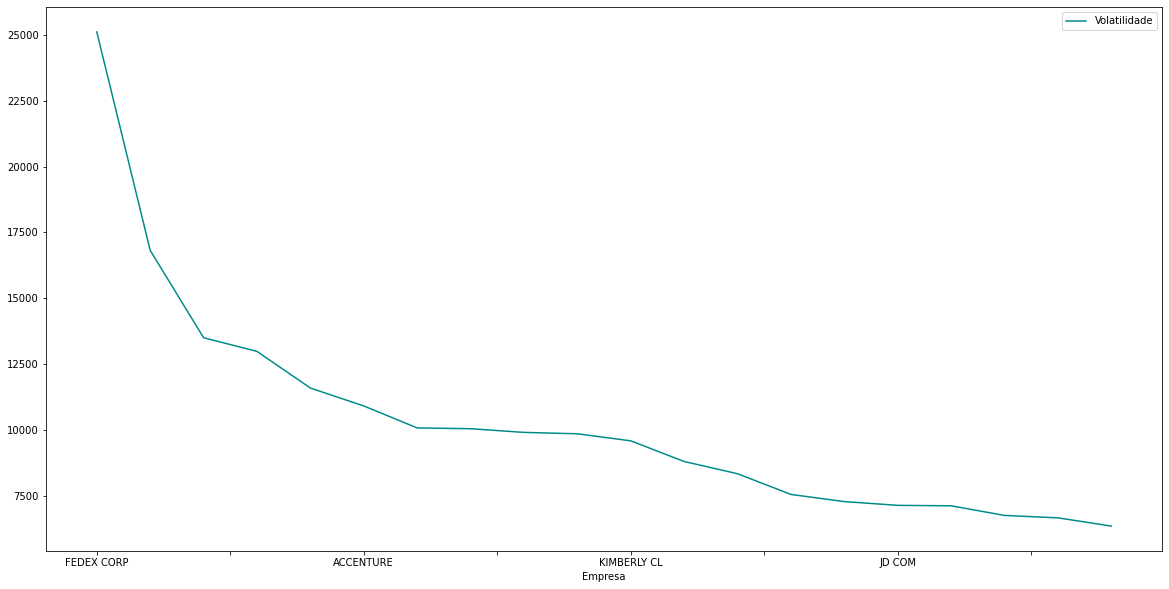

In [64]:
data_2020_largest.plot(x='Empresa', y='Volatilidade', figsize=(20, 10), color = 'darkcyan') 

## Analisando a variância da FEDEX em 2020

In [65]:
data_fedex = data_2020_largest[data_2020_largest['Empresa'].str.contains("FEDEX CORP")]
data_fedex = data_fedex.nlargest(1, 'Volatilidade')
data_fedex = data_fedex.drop(['Segmento', 'Volatilidade'], axis=1)
data_fedex.head()

,Empresa,1,2,3,4,5,6,7,8,9,10,11,12
412,FEDEX CORP,1238.16,1324.69,2263.04,2713.46,5393.29,4931.94,2550.0,8673.68,23372.64,32257.52,30223.89,26351.42


<AxesSubplot:xlabel='Empresa'>

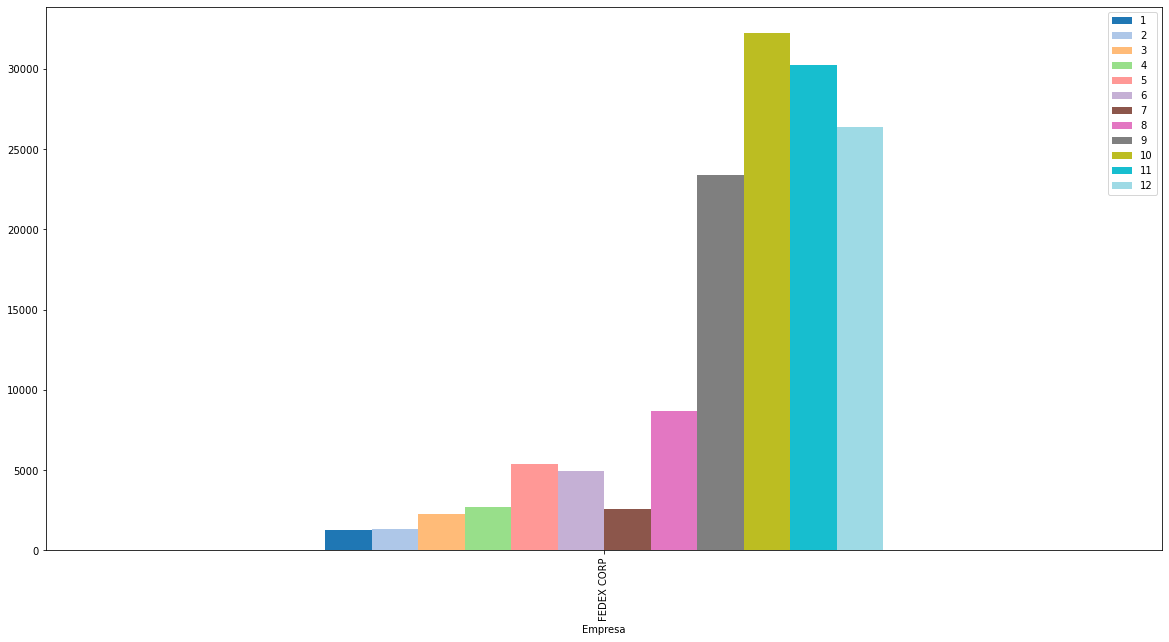

In [66]:
fig, ax = plt.subplots(figsize=(20,10))
data_fedex.plot.bar(x='Empresa', ax=ax, colormap='tab20')

## Analisando segmentos que mais valorizaram em 2020

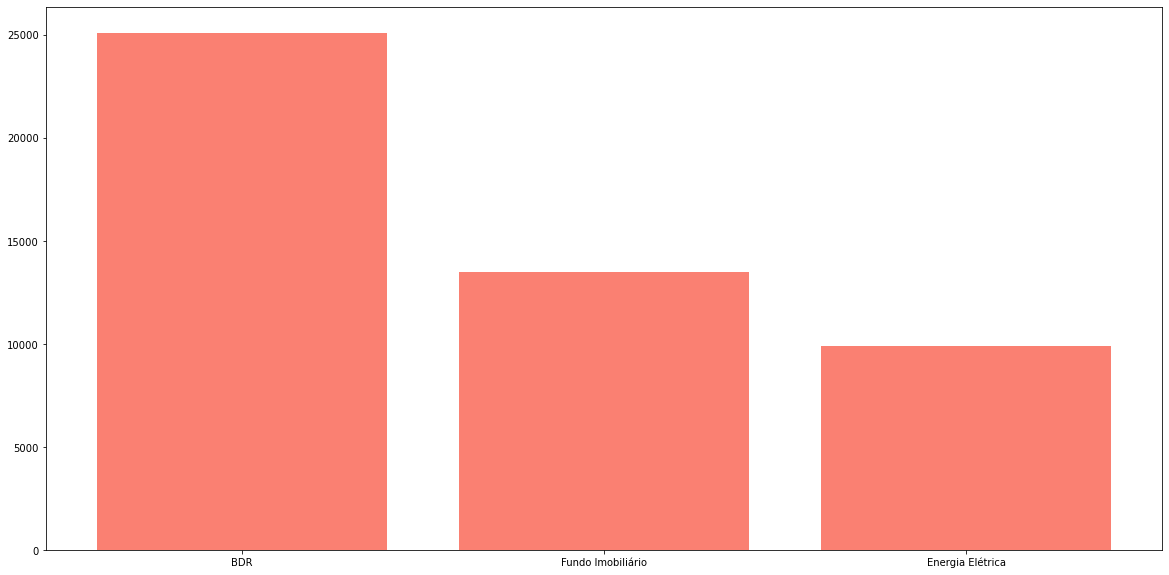

In [67]:
segmento = data_2020_largest['Segmento']
volatilidade = data_2020_largest['Volatilidade']

fig = plt.figure(figsize =(20, 10))
plt.bar(segmento[0:20], volatilidade[0:20],facecolor = 'salmon')
plt.show()

## Analisando segmentos que mais desvalorizaram em 2020

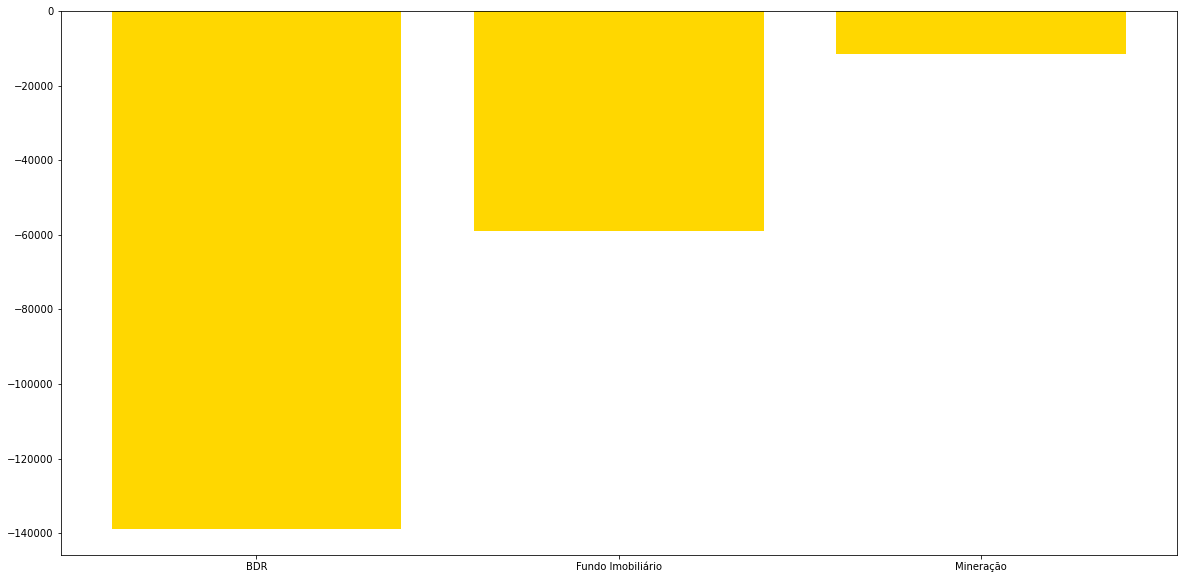

In [68]:
segmento = data_2020_lowest['Segmento']
volatilidade = data_2020_lowest['Volatilidade']

fig = plt.figure(figsize =(20, 10))
plt.bar(segmento[0:20], volatilidade[0:20], facecolor = 'gold')
plt.show()

## Correlação 2020

In [69]:
data_2020_cor = data_2020.copy()
data_2020_cor['Segmento'] = data_2020_cor['Segmento'].astype('category').cat.codes
data_2020_cor['Segmento']

0        1
1        1
2        1
3        1
4        1
        ..
3927    86
3928    86
3929    87
3930    87
3931    88
Name: Segmento, Length: 3932, dtype: int8

In [70]:
data_2020_cor['Empresa'] = data_2020_cor['Empresa'].astype('category').cat.codes
data_2020_cor['Empresa']

0       1623
1       1811
2       1812
3       1813
4       1814
        ... 
3927    2078
3928    2090
3929     528
3930    1934
3931      71
Name: Empresa, Length: 3932, dtype: int16

In [71]:
correlations = data_2020_cor.corr()
data_2020_cor.corr()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade
Segmento,1.000000,0.055788,0.005435,0.012699,0.014143,0.010699,0.011708,0.013724,0.010326,0.010540,0.009603,0.015419,0.018504,0.016533,-0.036250
Empresa,0.055788,1.000000,0.003760,0.005159,0.003706,0.004134,0.002383,0.004055,0.002982,0.004302,0.002552,0.002467,0.000723,0.001672,0.041521
1,0.005435,0.003760,1.000000,0.997890,0.937181,0.959635,0.998607,0.997490,0.992113,0.998453,0.961732,0.999269,0.771327,0.675496,-0.750502
2,0.012699,0.005159,0.997890,1.000000,0.957394,0.975558,0.994878,0.999654,0.983129,0.994748,0.943328,0.998035,0.755406,0.647515,-0.747977
3,0.014143,0.003706,0.937181,0.957394,1.000000,0.997414,0.925068,0.956809,0.889750,0.924822,0.808614,0.939735,0.636244,0.491033,-0.832342
4,0.010699,0.004134,0.959635,0.975558,0.997414,1.000000,0.949878,0.975151,0.920190,0.949708,0.848695,0.961739,0.602686,0.443184,-0.813350
5,0.011708,0.002383,0.998607,0.994878,0.925068,0.949878,1.000000,0.995510,0.996269,0.999831,0.971166,0.999007,0.566493,0.404635,-0.819980
6,0.013724,0.004055,0.997490,0.999654,0.956809,0.975151,0.995510,1.000000,0.983881,0.995324,0.944444,0.998414,0.577182,0.419594,-0.828420
7,0.010326,0.002982,0.992113,0.983129,0.889750,0.920190,0.996269,0.983881,1.000000,0.996440,0.987789,0.991752,0.524798,0.360675,-0.818853
8,0.010540,0.004302,0.998453,0.994748,0.924822,0.949708,0.999831,0.995324,0.996440,1.000000,0.971476,0.998805,0.537862,0.375159,-0.769481


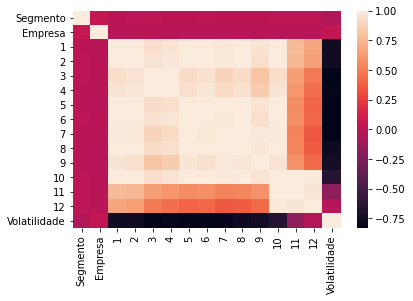

In [72]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlations)
plt.show()

## Naive Bayes Classification Model

In [73]:
data_2020_model = data_2020.copy()
data_2020_model.shape #before removing NaN

(3932, 15)

In [74]:
data_2020_cor['improve'] = np.where(data_2020_cor['Volatilidade'] >= 0, True, False)
data_2020_cor.dropna(inplace=True) # substituir o NaN, pq ha mais de 3600 linhas com NaN!!! TODO
data_2020_cor.head()

,Segmento,Empresa,1,2,3,4,5,6,7,8,9,10,11,12,Volatilidade,improve
0,1,1623,461.82,178.94,132.53,213.34,181.22,212.72,227.68,192.35,193.88,187.18,200.11,237.63,-224.19,False
1,1,1811,2771.00,1962.87,1479.26,1609.84,1873.52,2336.17,2497.16,2014.70,1529.36,1929.30,1040.19,1080.84,-1690.16,False
5,1,1914,1296.64,897.13,732.79,533.27,581.17,819.61,1181.11,963.10,973.84,837.86,942.20,1547.35,250.71,True
8,3,295,5070.09,3773.30,2903.71,2550.49,2900.04,3187.71,4063.70,3801.52,3081.12,3273.98,796.95,883.55,-4186.54,False
13,3,332,753.42,529.88,455.60,404.08,478.43,597.16,829.69,772.57,991.88,880.08,461.71,459.10,-294.32,False


In [75]:
data_2008_cor.shape #after removing NaN

(687, 15)

In [76]:
X = data_2020_cor.iloc[:,0:15].values
X

array([[ 1.00000e+00,  1.62300e+03,  4.61820e+02, ...,  2.00110e+02,
         2.37630e+02, -2.24190e+02],
       [ 1.00000e+00,  1.81100e+03,  2.77100e+03, ...,  1.04019e+03,
         1.08084e+03, -1.69016e+03],
       [ 1.00000e+00,  1.91400e+03,  1.29664e+03, ...,  9.42200e+02,
         1.54735e+03,  2.50710e+02],
       ...,
       [ 8.60000e+01,  1.08400e+03,  1.89526e+03, ...,  6.17160e+02,
         6.31890e+02, -1.26337e+03],
       [ 8.70000e+01,  5.28000e+02,  7.38801e+03, ...,  7.59170e+02,
         1.20430e+03, -6.18371e+03],
       [ 8.70000e+01,  1.93400e+03,  3.79260e+02, ...,  1.07230e+02,
         1.53750e+02, -2.25510e+02]])

In [77]:
y = data_2020_cor.loc[:,'improve'].values
y

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
        True,  True, False, False,  True, False, False,  True,  True,
        True, False,  True, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,

In [78]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
#creating labelEncoder
le = LabelEncoder()
# Converting string labels into numbers.
y = le.fit_transform(y)
y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [79]:
X[:,0] = le.fit_transform(X[:,0])
X

array([[    0.  ,  1623.  ,   461.82, ...,   200.11,   237.63,  -224.19],
       [    0.  ,  1811.  ,  2771.  , ...,  1040.19,  1080.84, -1690.16],
       [    0.  ,  1914.  ,  1296.64, ...,   942.2 ,  1547.35,   250.71],
       ...,
       [   70.  ,  1084.  ,  1895.26, ...,   617.16,   631.89, -1263.37],
       [   71.  ,   528.  ,  7388.01, ...,   759.17,  1204.3 , -6183.71],
       [   71.  ,  1934.  ,   379.26, ...,   107.23,   153.75,  -225.51]])

In [80]:
X[:,1] = le.fit_transform(X[:,1])
X

array([[    0.  ,   525.  ,   461.82, ...,   200.11,   237.63,  -224.19],
       [    0.  ,   565.  ,  2771.  , ...,  1040.19,  1080.84, -1690.16],
       [    0.  ,   588.  ,  1296.64, ...,   942.2 ,  1547.35,   250.71],
       ...,
       [   70.  ,   383.  ,  1895.26, ...,   617.16,   631.89, -1263.37],
       [   71.  ,   133.  ,  7388.01, ...,   759.17,  1204.3 , -6183.71],
       [   71.  ,   594.  ,   379.26, ...,   107.23,   153.75,  -225.51]])

## Let's go to split the dataset into Training and Test set with 80:20 ratio

In [81]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # 70% training and 30% test

In [82]:
#Pre-processing (StandardScaler or RobustScaler)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#scaler = StandardScaler() or
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
#Train the model using the training sets
model.fit(X_train, y_train)
GaussianNB(priors = None)
#Predict the response for test dataset
y_pred = model.predict(X_test) # y_pred holds the predicted label of our test set.

In [84]:
### Let's see the accuracy of our estimator.

In [85]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.3125


In [86]:
y_pred_train = model.predict(X_train)

y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.3973


In [87]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.3973
Test set score: 0.3125


In [88]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[15 87]
 [ 1 25]]

True Positives(TP) =  15

True Negatives(TN) =  25

False Positives(FP) =  87

False Negatives(FN) =  1


In [89]:
#15 + 25 = 40 correct predictions
#87 + 1 = 88 incorrect predictions

<AxesSubplot:>

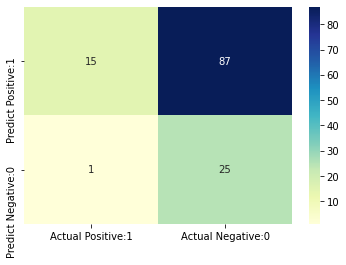

In [90]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')